# Project Description
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

# Attribute Information:
For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df =pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [3]:
df.shape

(7752, 25)

In [4]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

all are data types are float data type excluding date.

lets convert it into date time.


In [5]:
df['Date'] = pd.to_datetime(df.Date, format = '%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7750 non-null   float64       
 1   Date              7750 non-null   datetime64[ns]
 2   Present_Tmax      7682 non-null   float64       
 3   Present_Tmin      7682 non-null   float64       
 4   LDAPS_RHmin       7677 non-null   float64       
 5   LDAPS_RHmax       7677 non-null   float64       
 6   LDAPS_Tmax_lapse  7677 non-null   float64       
 7   LDAPS_Tmin_lapse  7677 non-null   float64       
 8   LDAPS_WS          7677 non-null   float64       
 9   LDAPS_LH          7677 non-null   float64       
 10  LDAPS_CC1         7677 non-null   float64       
 11  LDAPS_CC2         7677 non-null   float64       
 12  LDAPS_CC3         7677 non-null   float64       
 13  LDAPS_CC4         7677 non-null   float64       
 14  LDAPS_PPT1        7677 n

In [6]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

some column of the data is null/ but when we see the value of the data is only 1% of the total data.
so if we remove this from the main data set it is ok.
and if we fill the null value by any method so its not much affect on the result.

so we take decision to fill the null values.

<AxesSubplot:>

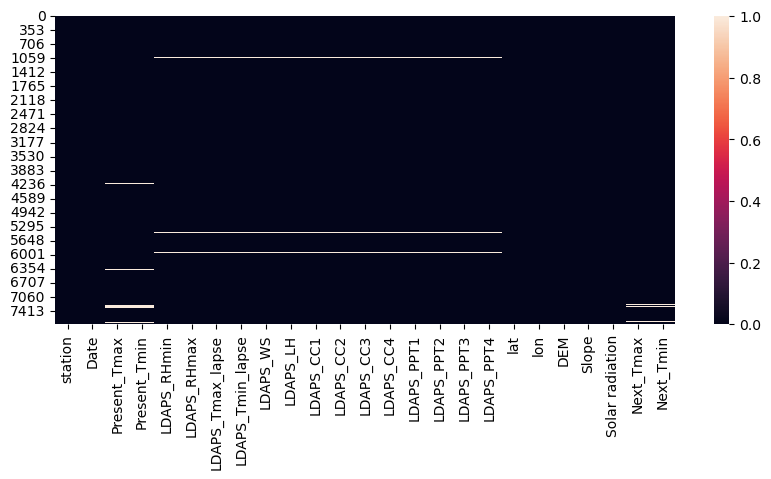

In [7]:
plt.figure(figsize = (10,4))
sns.heatmap(df.isnull())

we can clearly observe that null values present in the dataset.

In [8]:
# lets check the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print('\n', '--------------------------------------------------')

1.0     310
14.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
13.0    310
2.0     310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
25.0    310
Name: station, dtype: int64

 --------------------------------------------------
2013-06-30    25
2016-07-18    25
2016-07-25    25
2016-07-24    25
2016-07-23    25
              ..
2014-08-09    25
2014-08-08    25
2014-08-07    25
2014-08-06    25
2017-08-30    25
Name: Date, Length: 310, dtype: int64

 --------------------------------------------------
31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
36.9      1
21.2      1
20.1      1
36.4      1
20.3      1
Name: Present_Tmax, Length: 167, dtype: int64

 --------------------------------------------------
24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.6      1
14.2      1
29.1      1
29

In [9]:
# lets check unique values in station column
df['station'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., nan])

In [10]:
df['Date'].unique()

array(['2013-06-30T00:00:00.000000000', '2013-07-01T00:00:00.000000000',
       '2013-07-02T00:00:00.000000000', '2013-07-03T00:00:00.000000000',
       '2013-07-04T00:00:00.000000000', '2013-07-05T00:00:00.000000000',
       '2013-07-06T00:00:00.000000000', '2013-07-07T00:00:00.000000000',
       '2013-07-08T00:00:00.000000000', '2013-07-09T00:00:00.000000000',
       '2013-07-10T00:00:00.000000000', '2013-07-11T00:00:00.000000000',
       '2013-07-12T00:00:00.000000000', '2013-07-13T00:00:00.000000000',
       '2013-07-14T00:00:00.000000000', '2013-07-15T00:00:00.000000000',
       '2013-07-16T00:00:00.000000000', '2013-07-17T00:00:00.000000000',
       '2013-07-18T00:00:00.000000000', '2013-07-19T00:00:00.000000000',
       '2013-07-20T00:00:00.000000000', '2013-07-21T00:00:00.000000000',
       '2013-07-22T00:00:00.000000000', '2013-07-23T00:00:00.000000000',
       '2013-07-24T00:00:00.000000000', '2013-07-25T00:00:00.000000000',
       '2013-07-26T00:00:00.000000000', '2013-07-27

In [11]:
print("min.Date: ", df['Date'].min())
print("max.Date: ", df['Date'].max())

min.Date:  2013-06-30 00:00:00
max.Date:  2017-08-30 00:00:00


In [12]:
df  = df.dropna(axis=0, subset = ['station'])

In [13]:
df = df.dropna(axis = 0, subset = ['Date'])

In [14]:
print("Mean of Present_Tmax = ", df["Present_Tmax"].max())

Mean of Present_Tmax =  37.6


In [15]:
print("Mean of Present_Tmax = ", df["Present_Tmax"].mean())

Mean of Present_Tmax =  29.76846354166664


In [16]:
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7750.000000   7680.000000   7680.000000  7675.000000  7675.000000   
mean     13.000000     29.768464     23.225742    56.758747    88.377125   
std       7.211568      2.966947      2.409233    14.656200     7.183861   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    45.963839    84.223911   
50%      13.000000     29.900000     23.400000    55.039024    89.793480   
75%      19.000000     32.000000     24.900000    67.189583    93.743027   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7675.000000       7675.000000  7675.000000  7675.000000   
mean          29.613845         23.512997     7.096501    62.495273   
std            2.942632          2.342243     2.177080    33.679766   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673670         22.089794     5.679220    37.272626   
50%           29.703426         23.760199     6.547470    56.865482   
75%           31.709230         25.152881     8.031527    84.222851   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7675.000000  ...  7675.000000  7675.000000  7675.000000  7750.000000   
mean      0.368744  ...     0.482312     0.276208     0.267307    37.544720   
std       0.262369  ...     1.746438     1.148292     1.191776     0.050335   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.146673  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.315697  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.575126  ...     0.018340     0.007893     0.000041    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

               lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7750.000000  7750.000000  7750.000000      7750.000000  7723.000000   
mean    126.991400    61.854944     1.256692      5341.549330    30.275437   
std       0.079406    54.256953     1.369833       428.996445     3.123441   
min     126.826000    12.370000     0.098500      4329.520508    17.400000   
25%     126.937000    28.700000     0.271300      4999.018555    28.200000   
50%     126.995000    45.716000     0.618000      5436.345215    30.500000   
75%     127.042000    59.832400     1.767800      5728.316406    32.600000   
max     127.135000   212.335000     5.178200      5992.895996    38.900000   

         Next_Tmin  
count  7723.000000  
mean     22.932837  
std       2.483181  
min      11.300000  
25%      21.300000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

for to fill null values we have to fill this my mean and meadian method .a lso the data is only the 1% of the total dataset.
and it is float datatype.

here also we observe that there is huge diffrence between 75% data and maximum.
standard deviation is also low.

some columns have mean and median is almost same but some columns is mean is greater than the meadian.


In [17]:
# First lets convert null values in columns which don't have skewness with mean values, lets find out mean values.
print("Mean of Present_Tmax =     ", df["Present_Tmax"].mean())
print("Mean of Present_Tmin =     ", df["Present_Tmin"].mean())
print("Mean of LDAPS_RHmin =      ", df["LDAPS_RHmin"].mean())
print("Mean of LDAPS_Tmax_lapse = ", df["LDAPS_Tmax_lapse"].mean())
print("Mean of LDAPS_CC1 =        ", df["LDAPS_CC1"].mean())
print("Mean of LDAPS_CC2 =        ", df["LDAPS_CC2"].mean())
print("Mean of Next_Tmax =        ", df["Next_Tmax"].mean())
print("Mean of Next_Tmin =        ", df["Next_Tmin"].mean())

Mean of Present_Tmax =      29.76846354166664
Mean of Present_Tmin =      23.225742187500032
Mean of LDAPS_RHmin =       56.75874665799078
Mean of LDAPS_Tmax_lapse =  29.613845198720497
Mean of LDAPS_CC1 =         0.3687436533302945
Mean of LDAPS_CC2 =         0.3560470571946582
Mean of Next_Tmax =         30.275437006344692
Mean of Next_Tmin =         22.932836980448016


In [18]:
# now lets replace nan values with these mean values
mean_col=["Present_Tmax","Present_Tmin","LDAPS_RHmin","LDAPS_Tmax_lapse","LDAPS_CC1","LDAPS_CC2","Next_Tmax","Next_Tmin"]
for i in mean_col:
  df[i]=df[i].replace(np.nan,df[i].mean())

In [19]:
# In our data this columns have diffrence in mean and median thats why we select the median to fill the na values
# Now lets replace NaN values in columns where ourliers are present with median
print("Median of LDAPS_RHmax = ",df["LDAPS_RHmax"].median())
print("Median of LDAPS_Tmin_lapse = ", df["LDAPS_Tmin_lapse"].median())
print("Median of LDAPS_WS = ",df["LDAPS_WS"].median())
print("Median of LDAPS_LH = ",df["LDAPS_LH"].median())
print("Median of LDAPS_CC3 = ",df["LDAPS_CC3"].median())
print("Median of LDAPS_CC4 = ",df["LDAPS_CC4"].median())
print("Median of LDAPS_PPT1 = ",df["LDAPS_PPT1"].median())
print("Median of LDAPS_PPT2 = ",df["LDAPS_PPT2"].median())
print("Median of LDAPS_PPT3 = ",df["LDAPS_PPT3"].median())
print("Median of LDAPS_PPT4 = ",df["LDAPS_PPT4"].median())

Median of LDAPS_RHmax =  89.79347992
Median of LDAPS_Tmin_lapse =  23.76019884
Median of LDAPS_WS =  6.547470301
Median of LDAPS_LH =  56.86548154
Median of LDAPS_CC3 =  0.262554604
Median of LDAPS_CC4 =  0.227664469
Median of LDAPS_PPT1 =  0.0
Median of LDAPS_PPT2 =  0.0
Median of LDAPS_PPT3 =  0.0
Median of LDAPS_PPT4 =  0.0


In [20]:
# replacing null values with median values of that column
med_col=["LDAPS_RHmax","LDAPS_Tmin_lapse","LDAPS_WS","LDAPS_LH","LDAPS_CC3","LDAPS_CC4","LDAPS_PPT1","LDAPS_PPT2","LDAPS_PPT3","LDAPS_PPT4"]
for i in med_col:
  df[i]=df[i].replace(np.nan,df[i].median())

Here we have successfully replace nan values with median values.
We have successfully dropped the null values from our dataset for analysis

In [21]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

<AxesSubplot:>

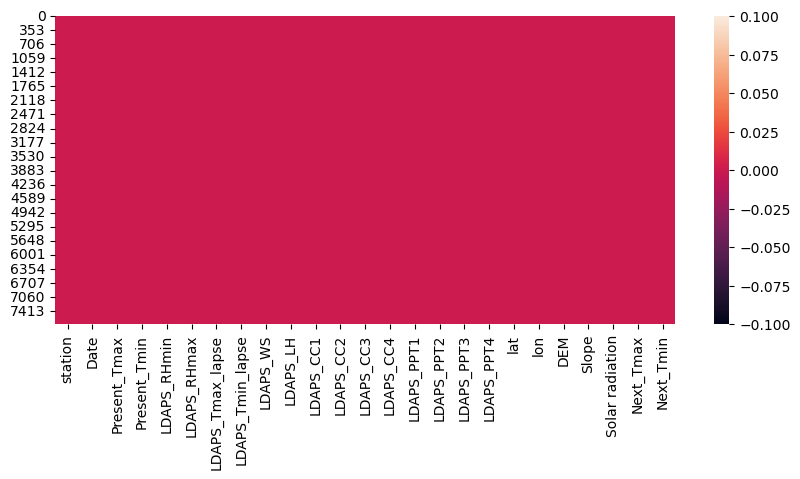

In [22]:
plt.figure(figsize = (10,4)),
sns.heatmap(df.isnull())

no null values present in our dateset.

In [23]:
df.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

In [24]:
# Lets check the no. of unique value in all the columns of the dataset
df.nunique()

station               25
Date                 310
Present_Tmax         168
Present_Tmin         156
LDAPS_RHmin         7673
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7676
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7570
LDAPS_CC2           7583
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 25
Solar radiation     1575
Next_Tmax            184
Next_Tmin            158
dtype: int64

## setting the Date as DataFrame index

In [25]:
df.set_index('Date', inplace = True)

the set_index() function is used to set the dataframeindex using existing columns. meke any column as index. Index value should be unique. Here collected the data as datewise. now we can fetch the data Datewise.

In [26]:
df.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688    91.116364   
2013-06-30      2.0          31.9          21.6    52.263397    90.604721   
2013-06-30      3.0          31.6          23.3    48.690479    83.973587   
2013-06-30      4.0          32.0          23.4    58.239788    96.483688   
2013-06-30      5.0          31.4          21.9    56.174095    90.155128   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
Date                                                                   
2013-06-30         28.074101         23.006936  6.818887   69.451805   
2013-06-30         29.850689         24.035009  5.691890   51.937448   
2013-06-30         30.091292         24.565633  6.138224   20.573050   
2013-06-30         29.704629         23.326177  5.650050   65.727144   
2013-06-30         29.113934         23.486480  5.735004  107.965535   

            LDAPS_CC1  ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat  \
Date                   ...                                                
2013-06-30   0.233947  ...         0.0         0.0         0.0  37.6046   
2013-06-30   0.225508  ...         0.0         0.0         0.0  37.6046   
2013-06-30   0.209344  ...         0.0         0.0         0.0  37.5776   
2013-06-30   0.216372  ...         0.0         0.0         0.0  37.6450   
2013-06-30   0.151407  ...         0.0         0.0         0.0  37.5507   

                lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  
Date                                                                          
2013-06-30  126.991  212.3350  2.7850      5992.895996       29.1       21.2  
2013-06-30  127.032   44.7624  0.5141      5869.312500       30.5       22.5  
2013-06-30  127.058   33.3068  0.2661      5863.555664       31.1       23.9  
2013-06-30  127.022   45.7160  2.5348      5856.964844       31.7       24.3  
2013-06-30  127.135   35.0380  0.5055      5859.552246       31.2       22.5  

[5 rows x 24 columns]

In [27]:
df['lat'].unique()

array([37.6046, 37.5776, 37.645 , 37.5507, 37.5102, 37.4697, 37.4967,
       37.4562, 37.5372, 37.6181, 37.4832, 37.5237])

In [28]:
df['lon'].unique()

array([126.991, 127.032, 127.058, 127.022, 127.135, 127.042, 126.838,
       126.91 , 126.826, 126.955, 127.085, 126.988, 127.083, 126.927,
       126.937, 126.995, 127.099, 127.024, 126.938, 127.004, 127.04 ,
       127.086, 126.891, 126.909, 126.97 ])

In [29]:
df['Slope'].unique()

array([2.785 , 0.5141, 0.2661, 2.5348, 0.5055, 0.1457, 0.0985, 1.5629,
       0.4125, 5.1782, 0.6233, 0.5931, 2.6865, 0.618 , 0.8552, 2.2579,
       0.697 , 1.2313, 1.7678, 4.7296, 0.5721, 0.1332, 0.1554, 0.2223,
       0.2713])

EXPLORATARY DATA ANALYSIS

In [30]:
cat_col = [ 'lat','lon','Date','station','DEM','Slope']

In [31]:
num_col = [ 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin','LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 
           'LDAPS_WS','LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4','LDAPS_PPT1',
           'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'Solar radiation']

In [32]:
target_v = [ 'Next_Tmax', 'Next_Tmin']

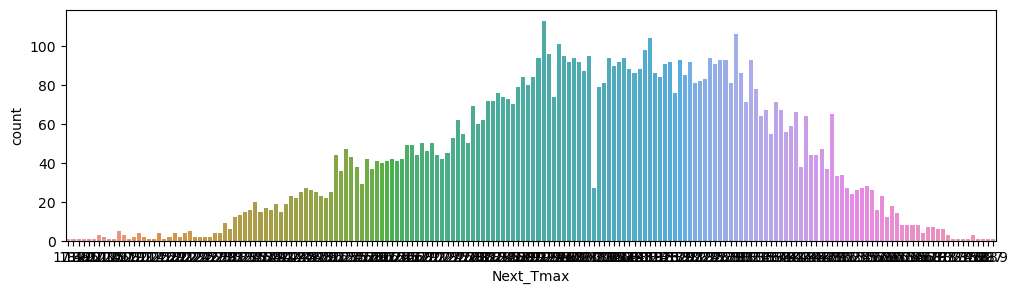

In [33]:
plt.figure(figsize=(12,3))
ax = sns.countplot(df['Next_Tmax'])
plt.show()

we observe here from the grpah as per count the next_max tempreture is increasing.

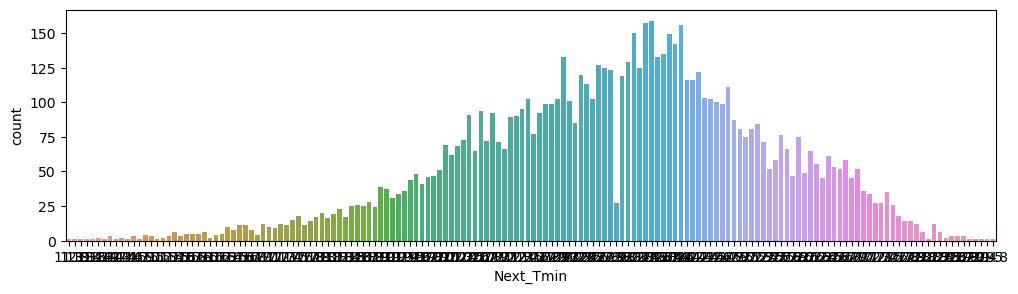

In [34]:
plt.figure(figsize=(12,3))
ax = sns.countplot(df['Next_Tmin'])
plt.show()

we observe here from the grpah Next_tmin temepreture is incresing as Tmax is incresing

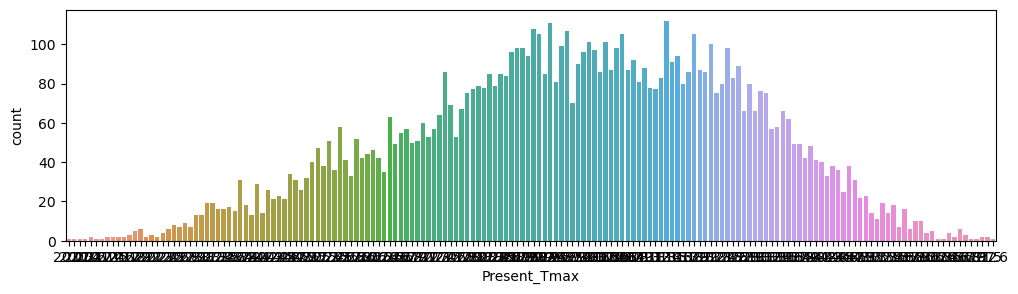

In [35]:
plt.figure(figsize=(12,3))
ax = sns.countplot(df['Present_Tmax'])
plt.show()

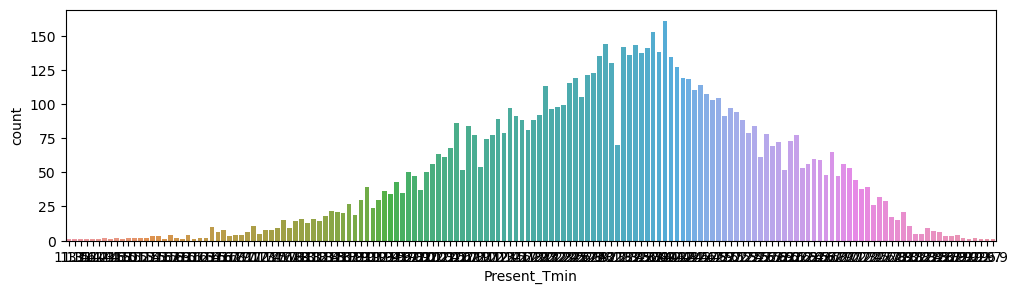

In [36]:
plt.figure(figsize=(12,3))
ax = sns.countplot(df['Present_Tmin'])
plt.show()

<AxesSubplot:title={'center':'comparion between present temp. with min relative humidity'}, xlabel='Present_Tmax', ylabel='LDAPS_RHmin'>

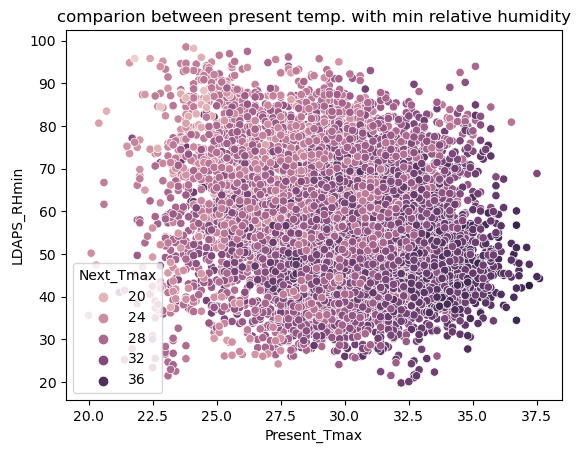

In [37]:
plt.title("comparion between present temp. with min relative humidity")
sns.scatterplot(x= 'Present_Tmax', y = 'LDAPS_RHmin', data= df, hue ='Next_Tmax')

the graph shows that present Tmax in increasing with realtive humidity present.It affects on the tempreture little bit.

<AxesSubplot:title={'center':'comparion between present temp. with max relative humidity'}, xlabel='Present_Tmax', ylabel='LDAPS_RHmax'>

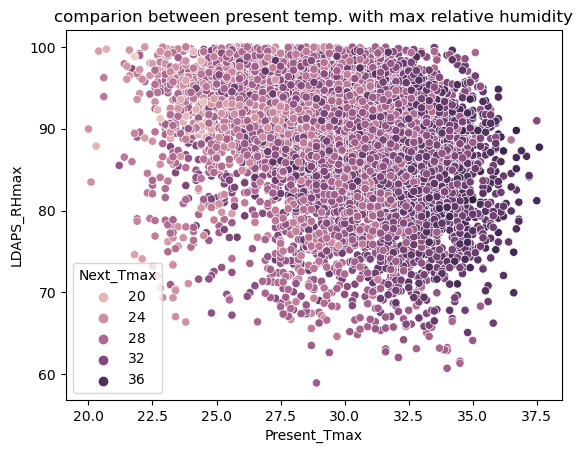

In [38]:
plt.title("comparion between present temp. with max relative humidity")
sns.scatterplot(x= 'Present_Tmax', y = 'LDAPS_RHmax', data= df, hue ='Next_Tmax')

the graph shows the presnttmax is decraesing with incresing the realtive humidity.

<AxesSubplot:title={'center':'comparion between present temp. with max relative humidity'}, xlabel='LDAPS_RHmax', ylabel='LDAPS_RHmin'>

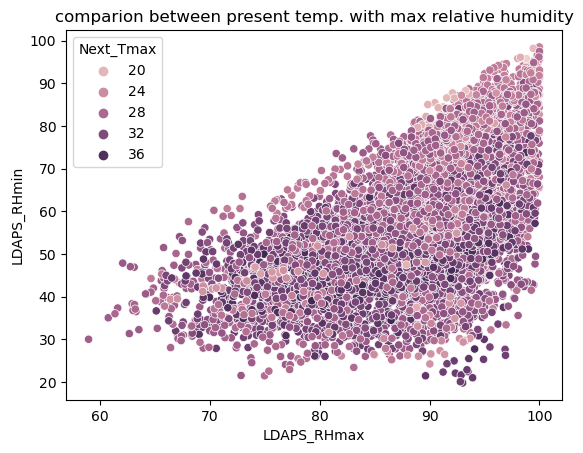

In [39]:
plt.title("comparion between present temp. with max relative humidity")
sns.scatterplot(x= 'LDAPS_RHmax', y = 'LDAPS_RHmin', data= df, hue ='Next_Tmax')

<AxesSubplot:title={'center':'comparion between present temp. with min relative humidity'}, xlabel='Present_Tmax', ylabel='LDAPS_RHmin'>

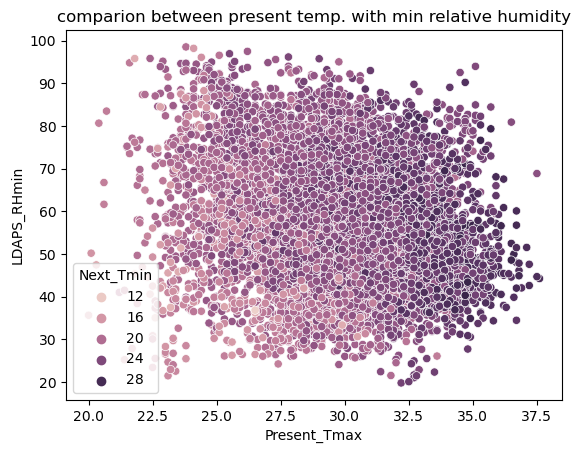

In [40]:
plt.title("comparion between present temp. with min relative humidity")
sns.scatterplot(x= 'Present_Tmax', y = 'LDAPS_RHmin', data= df, hue ='Next_Tmin')

<AxesSubplot:title={'center':'comparion between present temp. with min relative humidity'}, xlabel='Present_Tmin', ylabel='LDAPS_RHmin'>

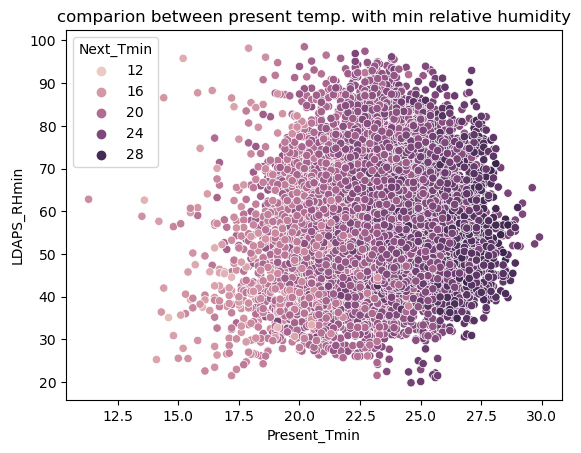

In [41]:
plt.title("comparion between present temp. with min relative humidity")
sns.scatterplot(x= 'Present_Tmin', y = 'LDAPS_RHmin', data= df, hue ='Next_Tmin')

<AxesSubplot:title={'center':'comparion between present temp. with max relative humidity'}, xlabel='Present_Tmin', ylabel='LDAPS_RHmax'>

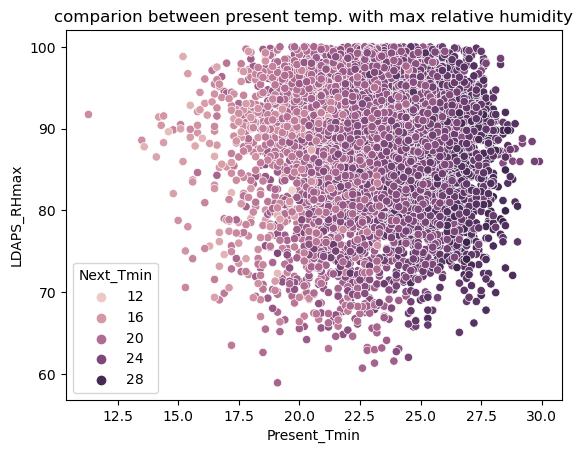

In [42]:
plt.title("comparion between present temp. with max relative humidity")
sns.scatterplot(x= 'Present_Tmin', y = 'LDAPS_RHmax', data= df, hue ='Next_Tmin')

This graph shows the Relation betwwn the relative humidity and Tempreture minimum.

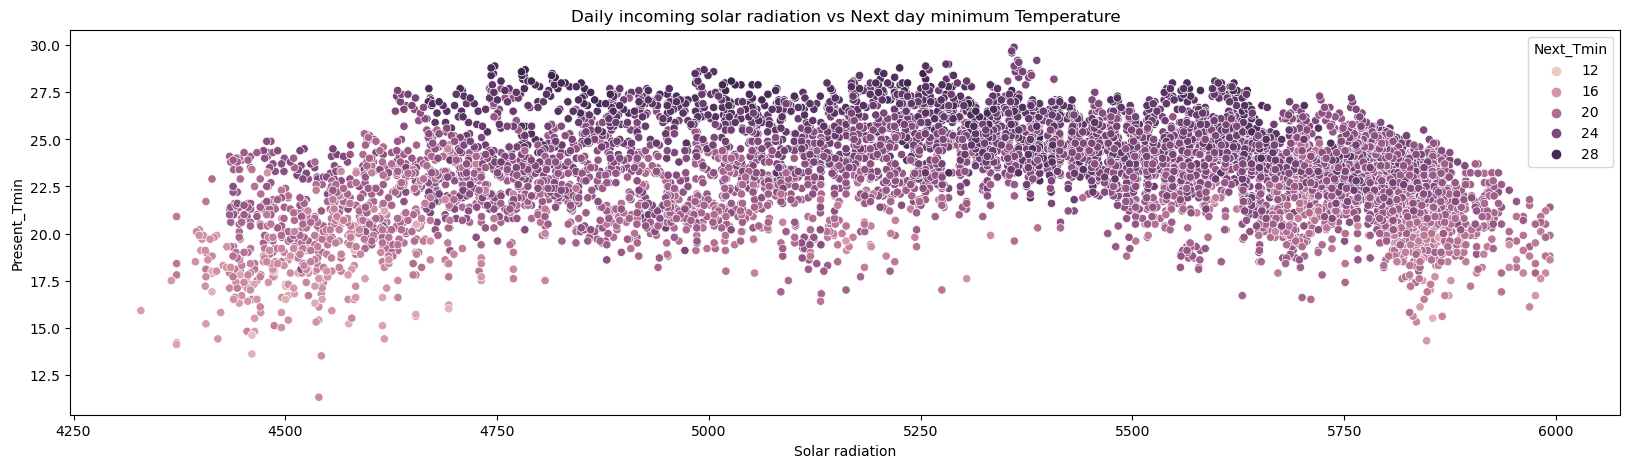

In [43]:
# lineplot Deisplay distribution of data across Daily incoming solar radiation vs Next day minimum Temperature.
plt.figure(figsize=(20,5))
plt.title('Daily incoming solar radiation vs Next day minimum Temperature')
sns.scatterplot(x='Solar radiation',y='Present_Tmin',hue = 'Next_Tmin',data=df)
plt.show()

The graph shpws the solar radiation increases the present temprature minumum. but not much in extent.

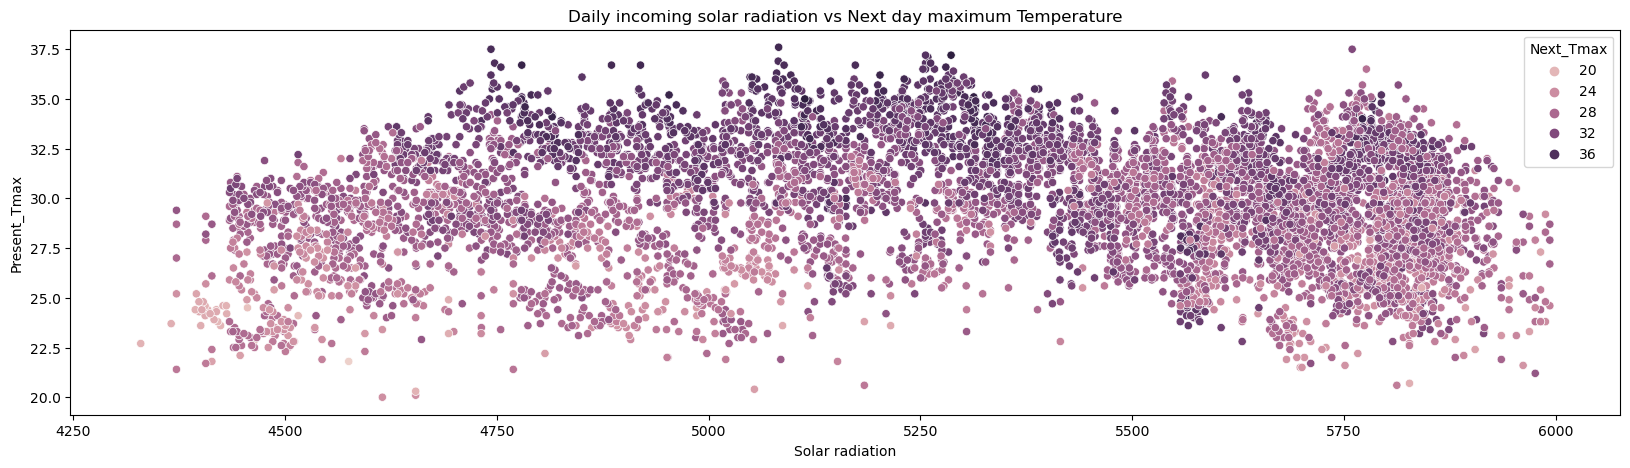

In [44]:
# lineplot Deisplay distribution of data across Daily incoming solar radiation vs Next day minimum Temperature.
plt.figure(figsize=(20,5))
plt.title('Daily incoming solar radiation vs Next day maximum Temperature')
sns.scatterplot(x='Solar radiation',y='Present_Tmax', hue = 'Next_Tmax',data=df)
plt.show()

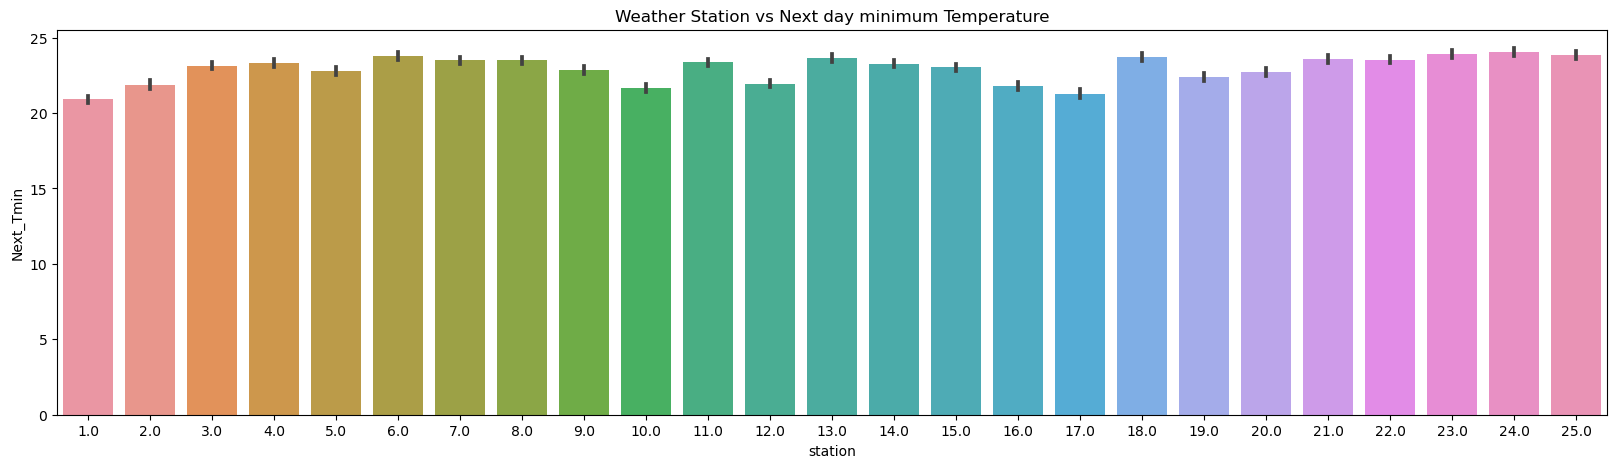

In [45]:
# lineplot Display distribution of data across Weather Station vs Next day minimum Temperature.
plt.figure(figsize=(20,5))
plt.title('Weather Station vs Next day minimum Temperature')
sns.barplot(x='station',y='Next_Tmin',data=df)
plt.show()


The bar plot clears that next day minimum temperature is high & low at station 18 & (1,17) respectively

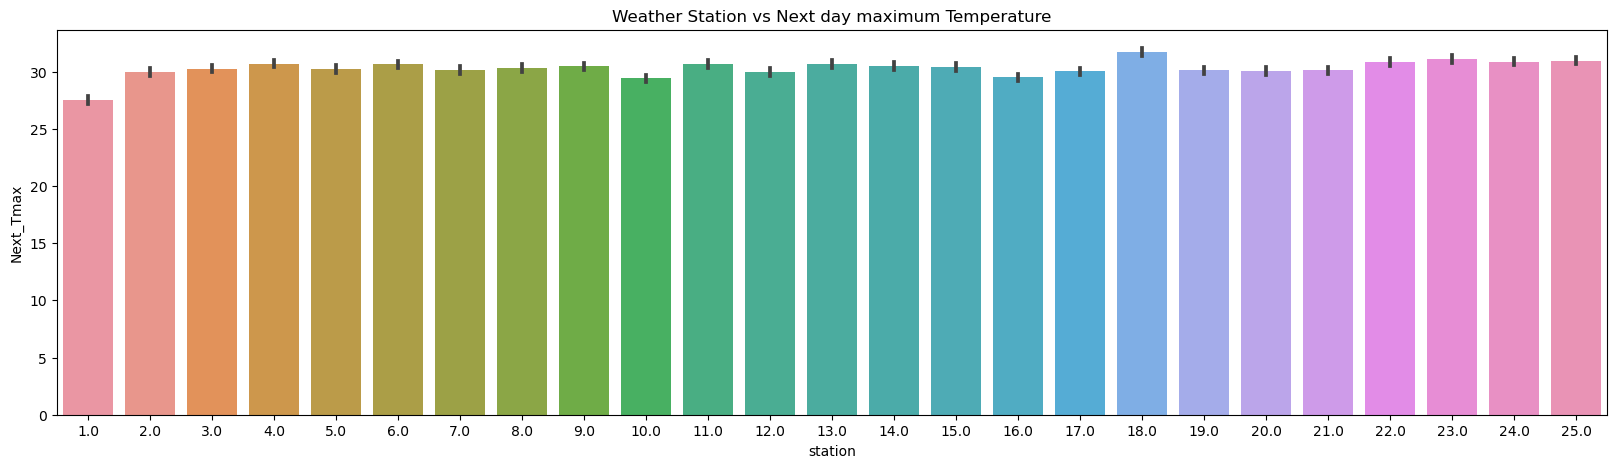

In [46]:
# lineplot Display distribution of data across Weather Station vs Next day maximum Temperature.
plt.figure(figsize=(20,5))
plt.title('Weather Station vs Next day maximum Temperature')
sns.barplot(x='station',y='Next_Tmax',data=df)
plt.show()

The bar plot clears that next day minimum temperature is high & low at station 18 & (1,10) respectively

Text(0, 0.5, 'next-day average wind speed')

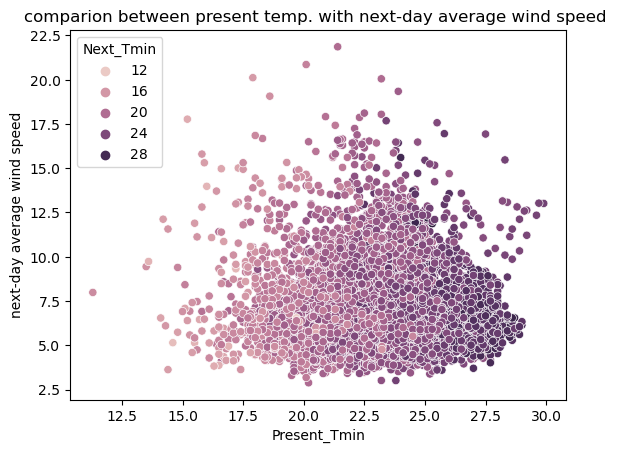

In [47]:
# LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
plt.title("comparion between present temp. with next-day average wind speed ")
sns.scatterplot(x= 'Present_Tmin', y = 'LDAPS_WS', data= df, hue ='Next_Tmin')
plt.ylabel('next-day average wind speed')

Text(0, 0.5, 'next-day average wind speed')

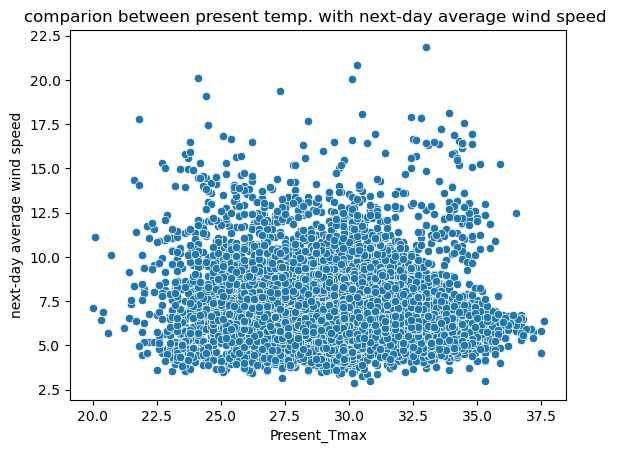

In [48]:
plt.title("comparion between present temp. with next-day average wind speed ")
sns.scatterplot(x= 'Present_Tmax', y = 'LDAPS_WS', data= df)
plt.ylabel('next-day average wind speed')

Text(0, 0.5, 'Next_Tmax')

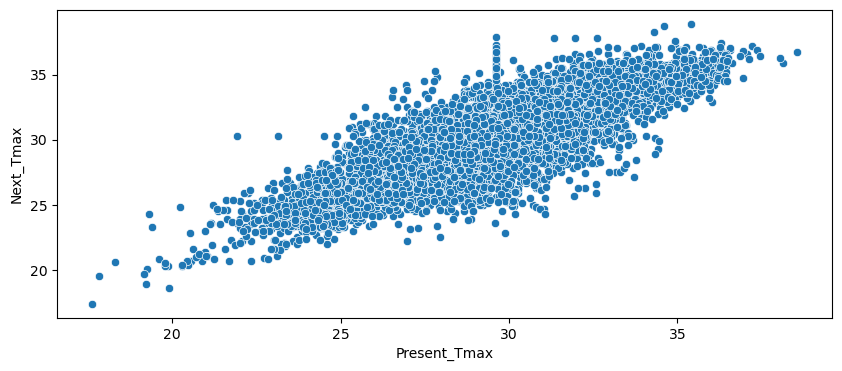

In [49]:
plt.figure(figsize=(10,4))
sns.scatterplot(df['LDAPS_Tmax_lapse'],df['Next_Tmax'])
plt.xlabel('Present_Tmax')
plt.ylabel('Next_Tmax')

With LDAPS_Tmax_lapse temp is also getting higher

Text(0, 0.5, 'Next_Tmin')

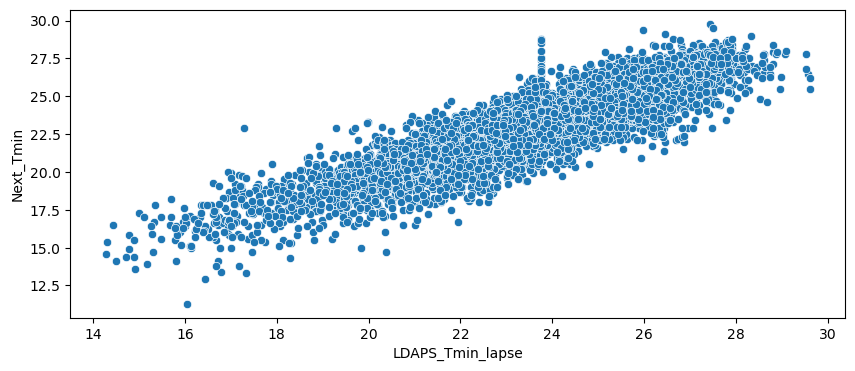

In [50]:
plt.figure(figsize=(10,4))
sns.scatterplot(df['LDAPS_Tmin_lapse'], df['Next_Tmin'])
plt.xlabel('LDAPS_Tmin_lapse')
plt.ylabel('Next_Tmin')

Text(0, 0.5, 'Next_Tmin')

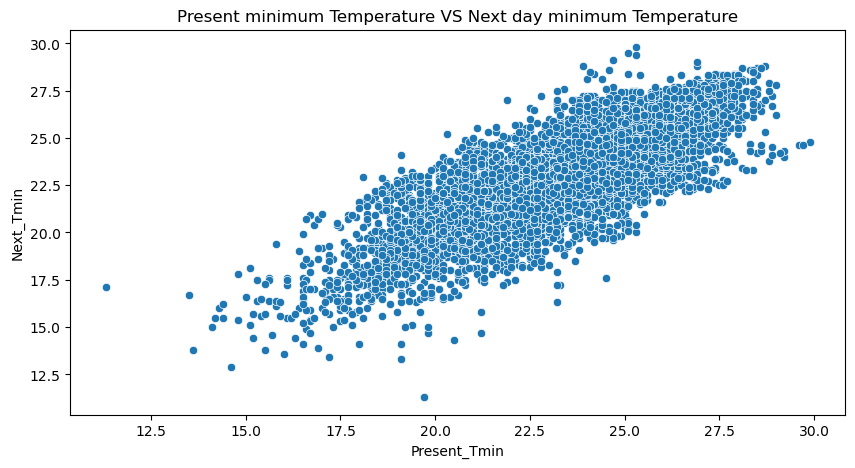

In [51]:
# scatterplot Display distribution of data across Present minimum Temperature VS Next day minimum Temperature
plt.figure(figsize=(10,5))
plt.title('Present minimum Temperature VS Next day minimum Temperature')
sns.scatterplot(df['Present_Tmin'], df['Next_Tmin'])
plt.xlabel('Present_Tmin')
plt.ylabel('Next_Tmin')

Here we can notice when Present_Tmin in decreasing, Next_Tmin also getting lower

Text(0, 0.5, 'Next_Tmax')

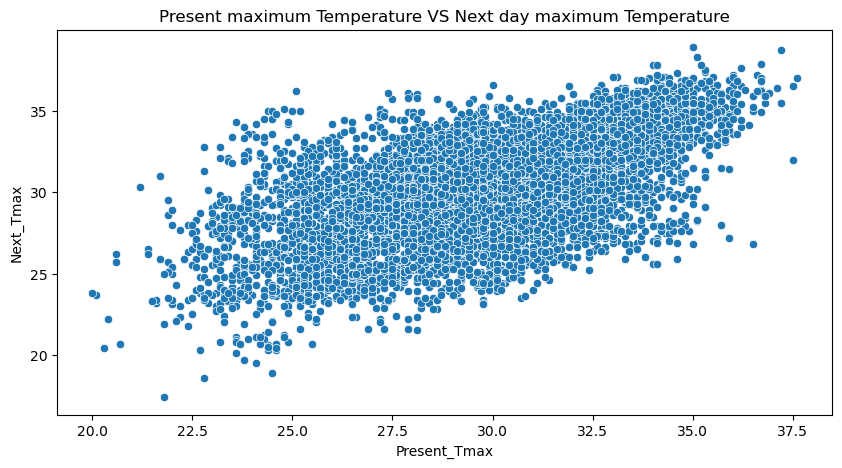

In [52]:
# scatterplot Display distribution of data across Present maximum Temperature VS Next day maximum Temperature
plt.figure(figsize=(10,5))
plt.title('Present maximum Temperature VS Next day maximum Temperature')
sns.scatterplot(df['Present_Tmax'], df['Next_Tmax'])
plt.xlabel('Present_Tmax')
plt.ylabel('Next_Tmax')

Here we can notice when Present_Tmax in increasing, Next_Tmmax also getting increasing

<AxesSubplot:xlabel='Present_Tmax', ylabel='Next_Tmax'>

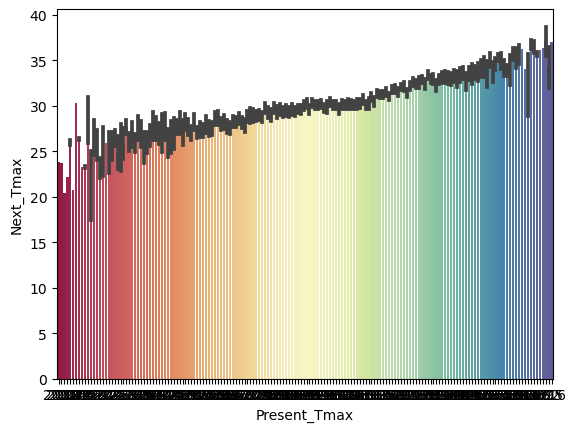

In [53]:
sns.barplot(x='Present_Tmax', y='Next_Tmax', data = df, palette= "Spectral")

Here we can notice when Present_Tmax in increasing, Next_Tmmax also getting increasing

<AxesSubplot:xlabel='Present_Tmax', ylabel='Present_Tmin'>

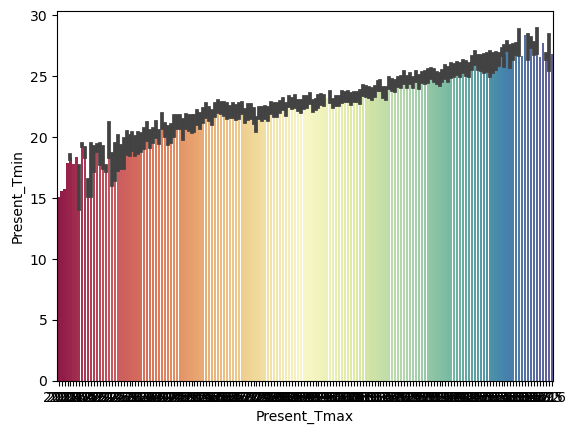

In [54]:
sns.barplot(x='Present_Tmax', y='Present_Tmin', data = df, palette= "Spectral")

Here we can notice when Present_Tmin in increasing, Next_Tmin also getting increasing

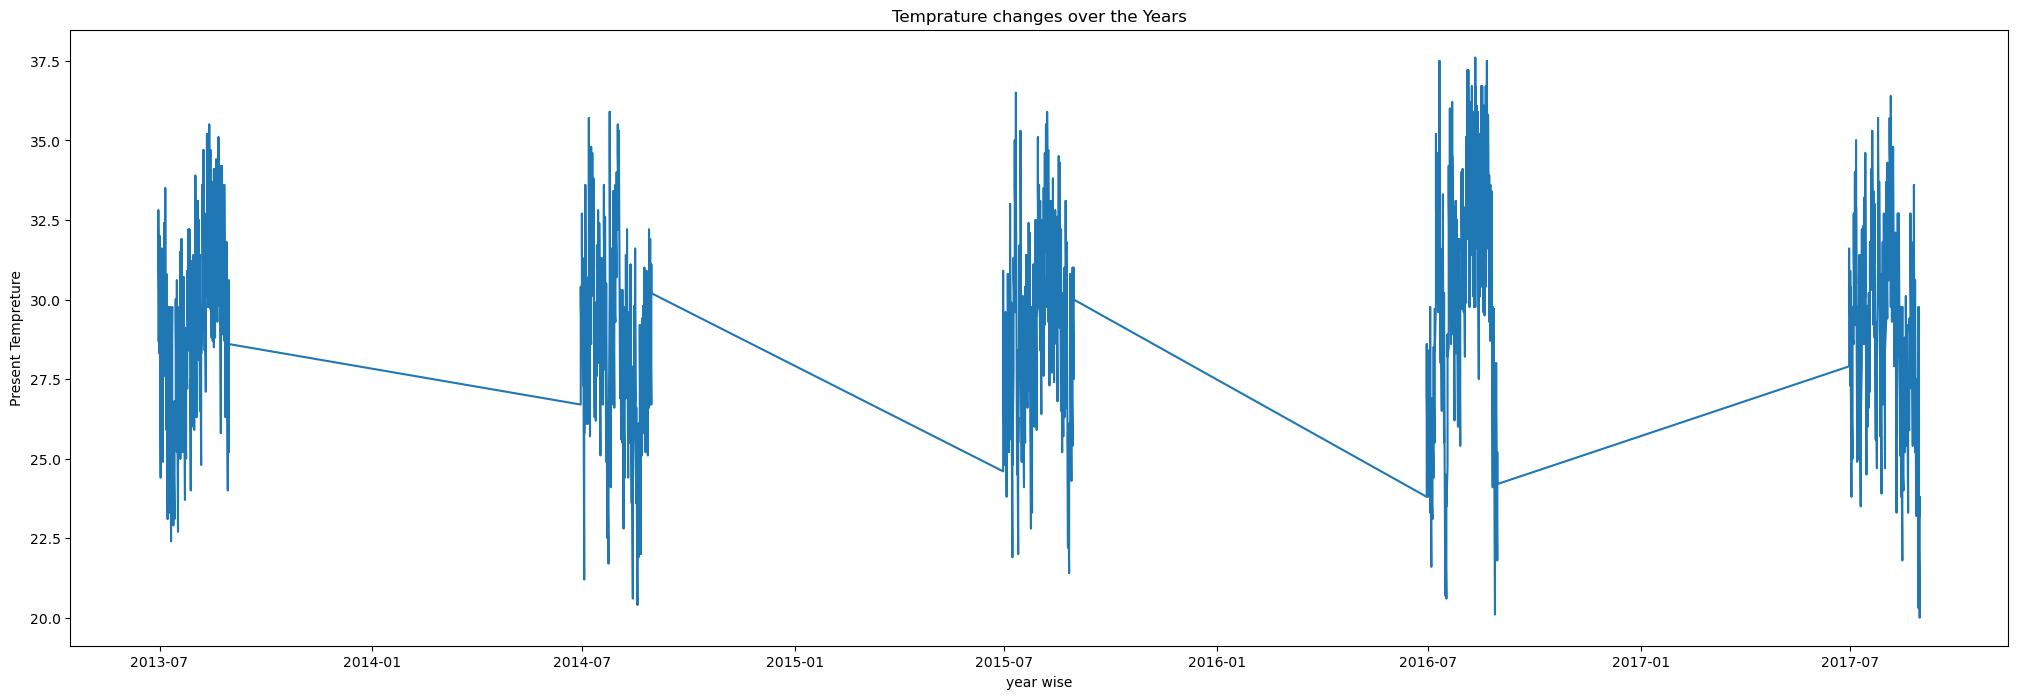

In [55]:
plt.figure(figsize = (25,8))
plt.plot(df.Present_Tmax, label = 'Temp')
plt.ylabel('Present Tempreture')
plt.xlabel('year wise')
plt.title('Temprature changes over the Years')
plt.show()

we can observe here in the year 2016 temp is very high as comapred to the 2013,2014,2015 and 2017 years

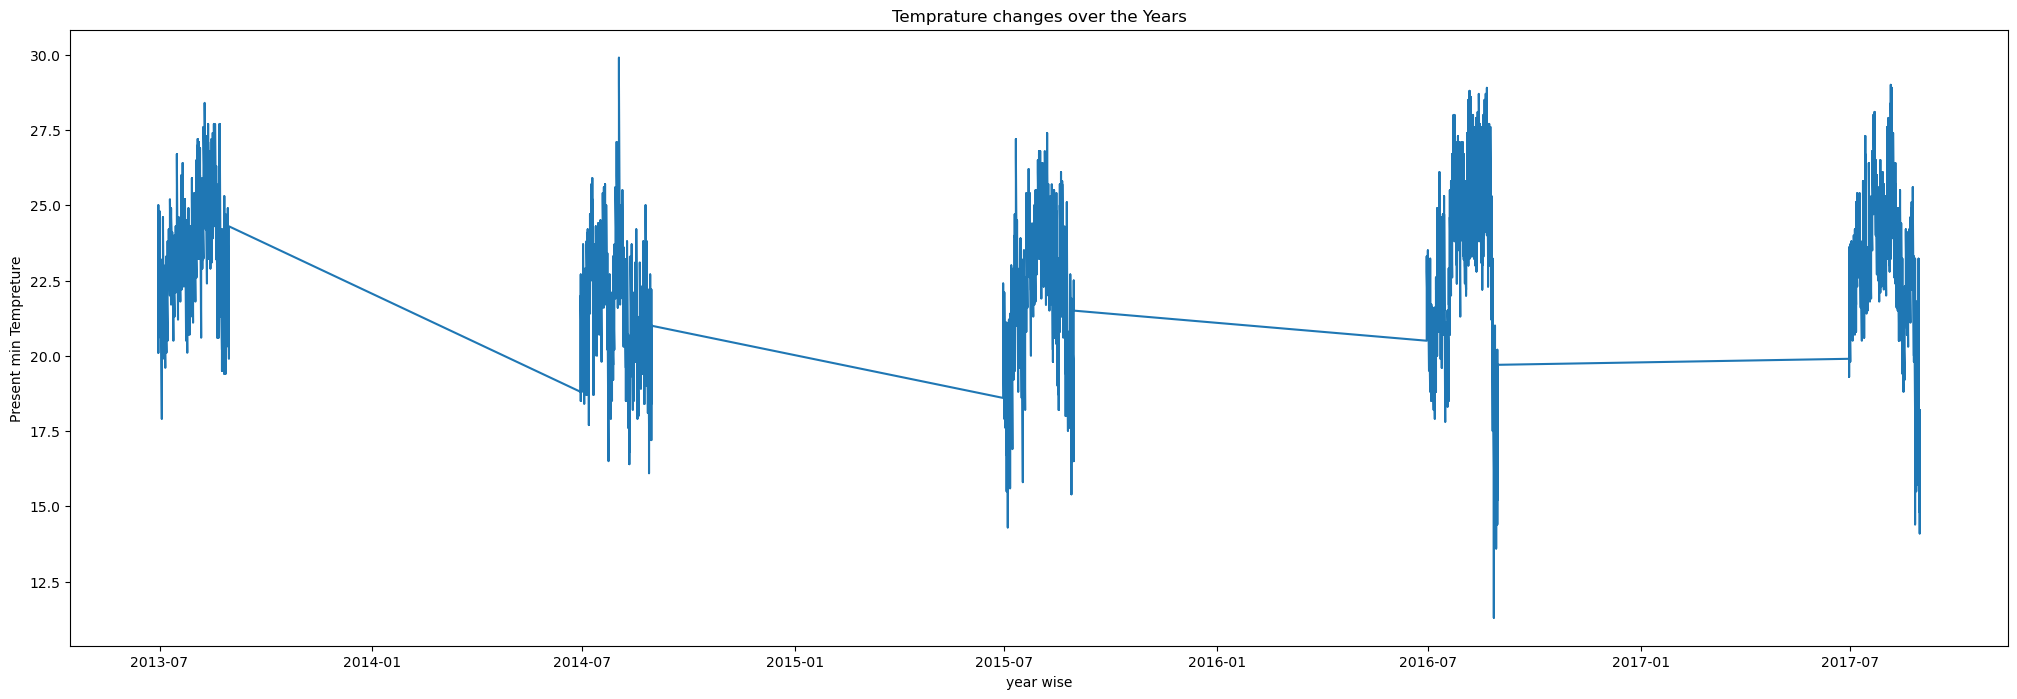

In [56]:
plt.figure(figsize = (25,8))
plt.plot(df.Present_Tmin, label = 'Temp')
plt.ylabel('Present min Tempreture')
plt.xlabel('year wise')
plt.title('Temprature changes over the Years')
plt.show()

we can observe here in the year 2016 temp is very low as comapred to the 2013,2014,2015 and 2017 years

Text(0.5, 1.0, 'The General Trends of all Values')

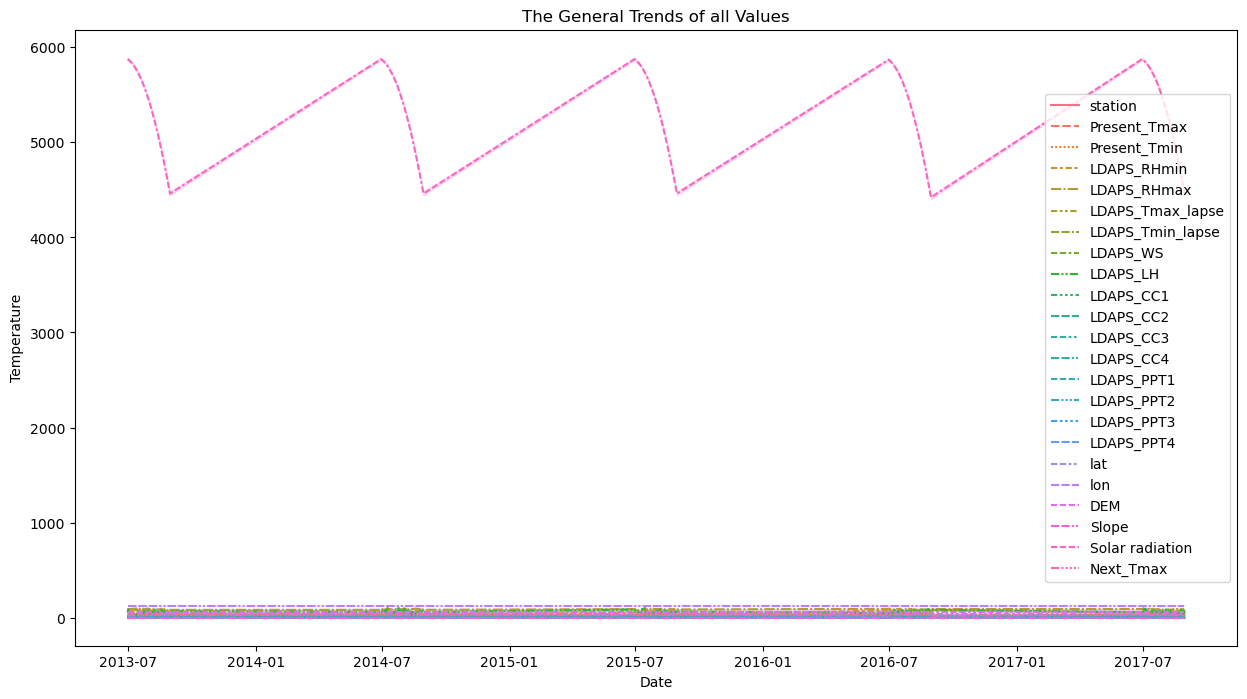

In [57]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df.iloc[:,:-1])
plt.ylabel('Temperature')
plt.title('The General Trends of all Values')

we observe from the graph, present tamax and present Tmin has th relation...but is not showing the clear picture.

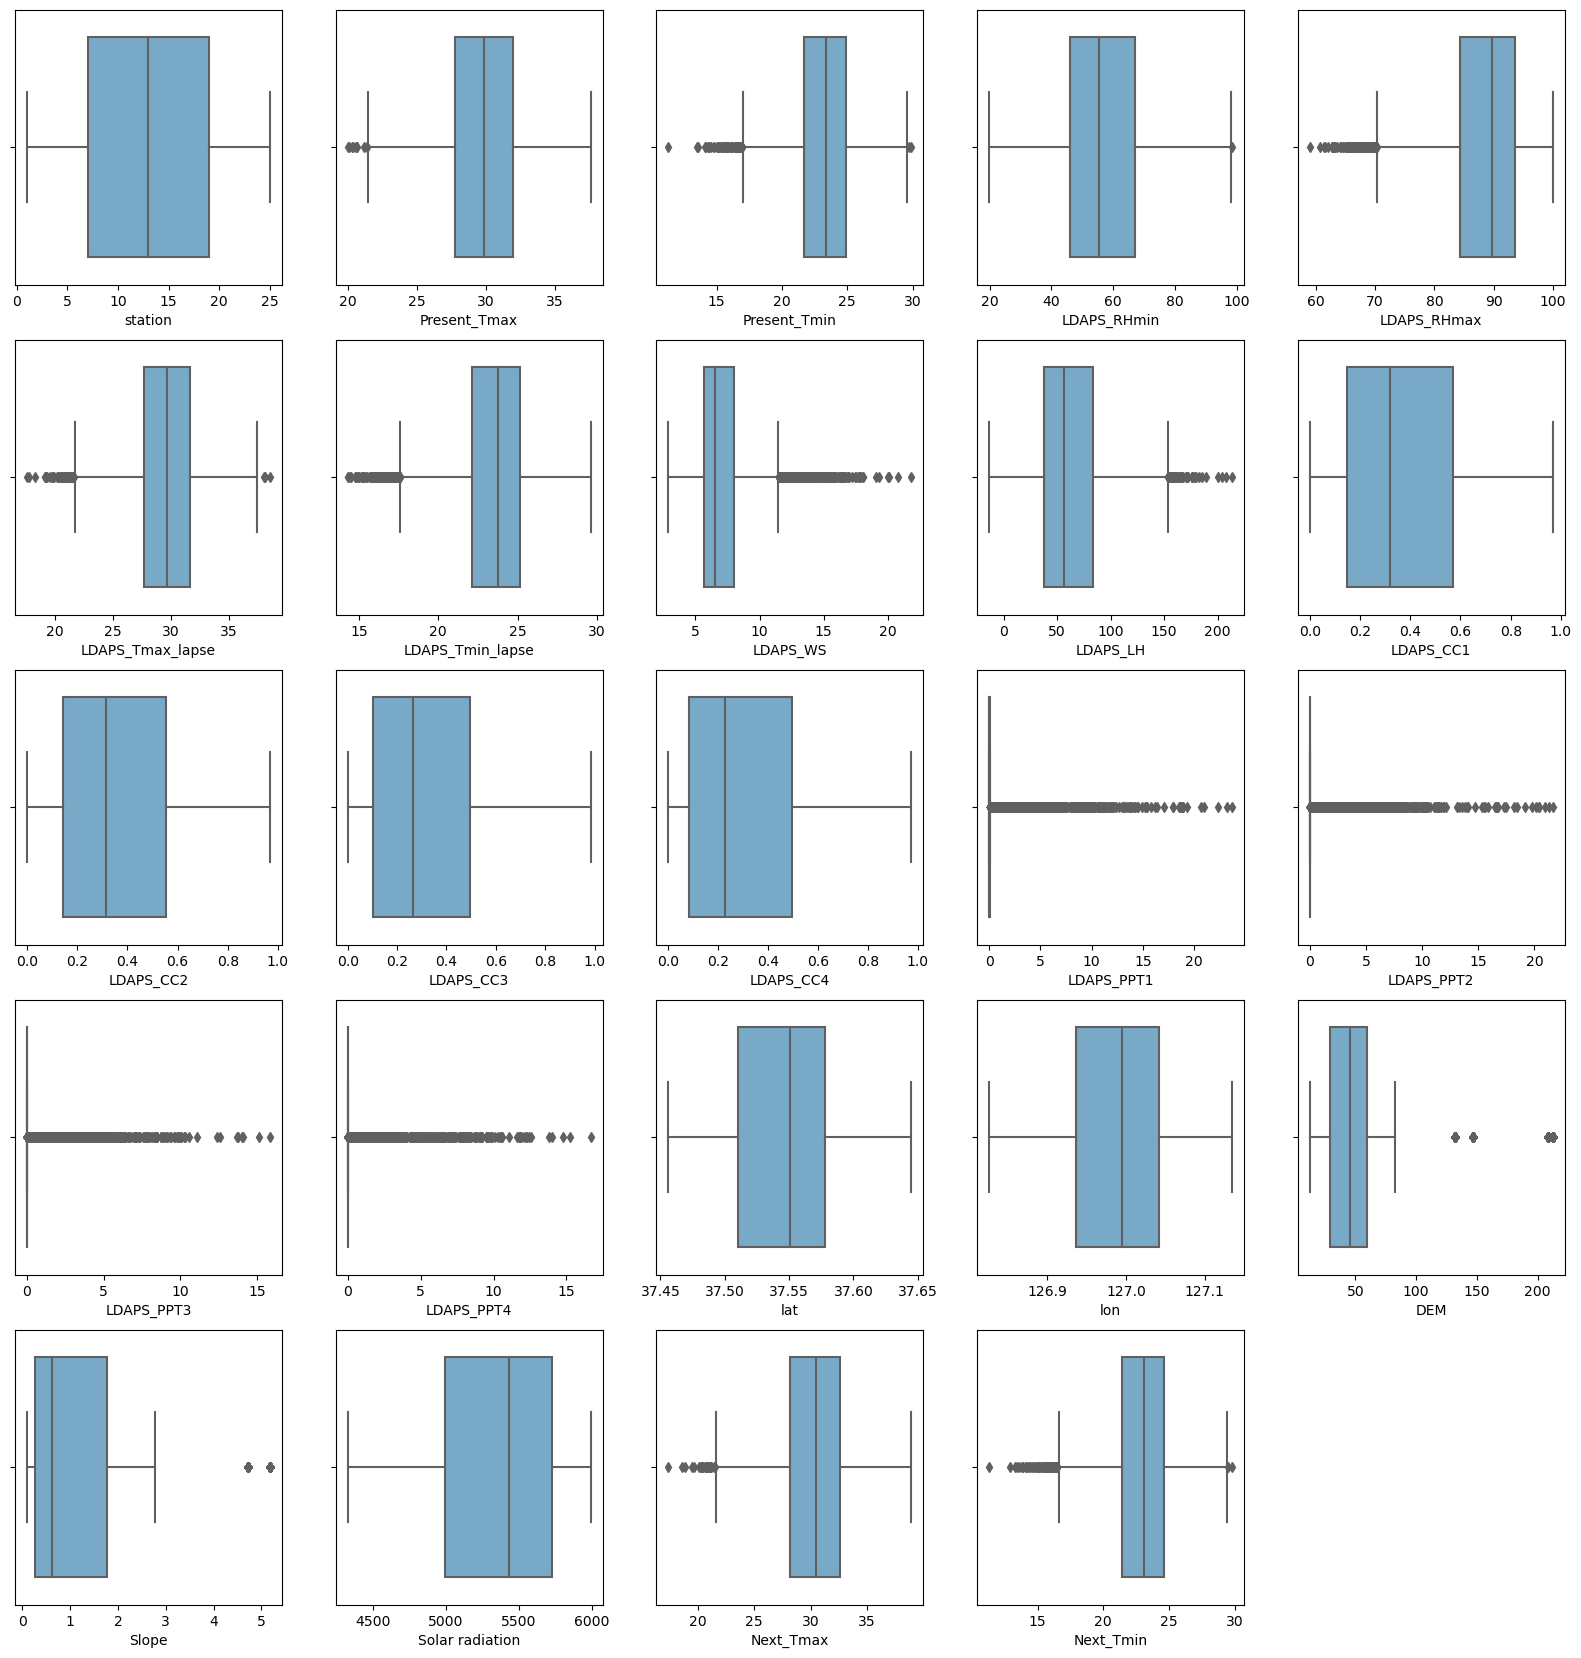

In [58]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=25:
        plt.subplot(6,5,p)
        sns.boxplot(df[i], palette = 'Blues', orient = 'h')
        plt.xlabel(i)
        
    p +=1
plt.show()

Most of the columns has the outliers. we have to remove it.

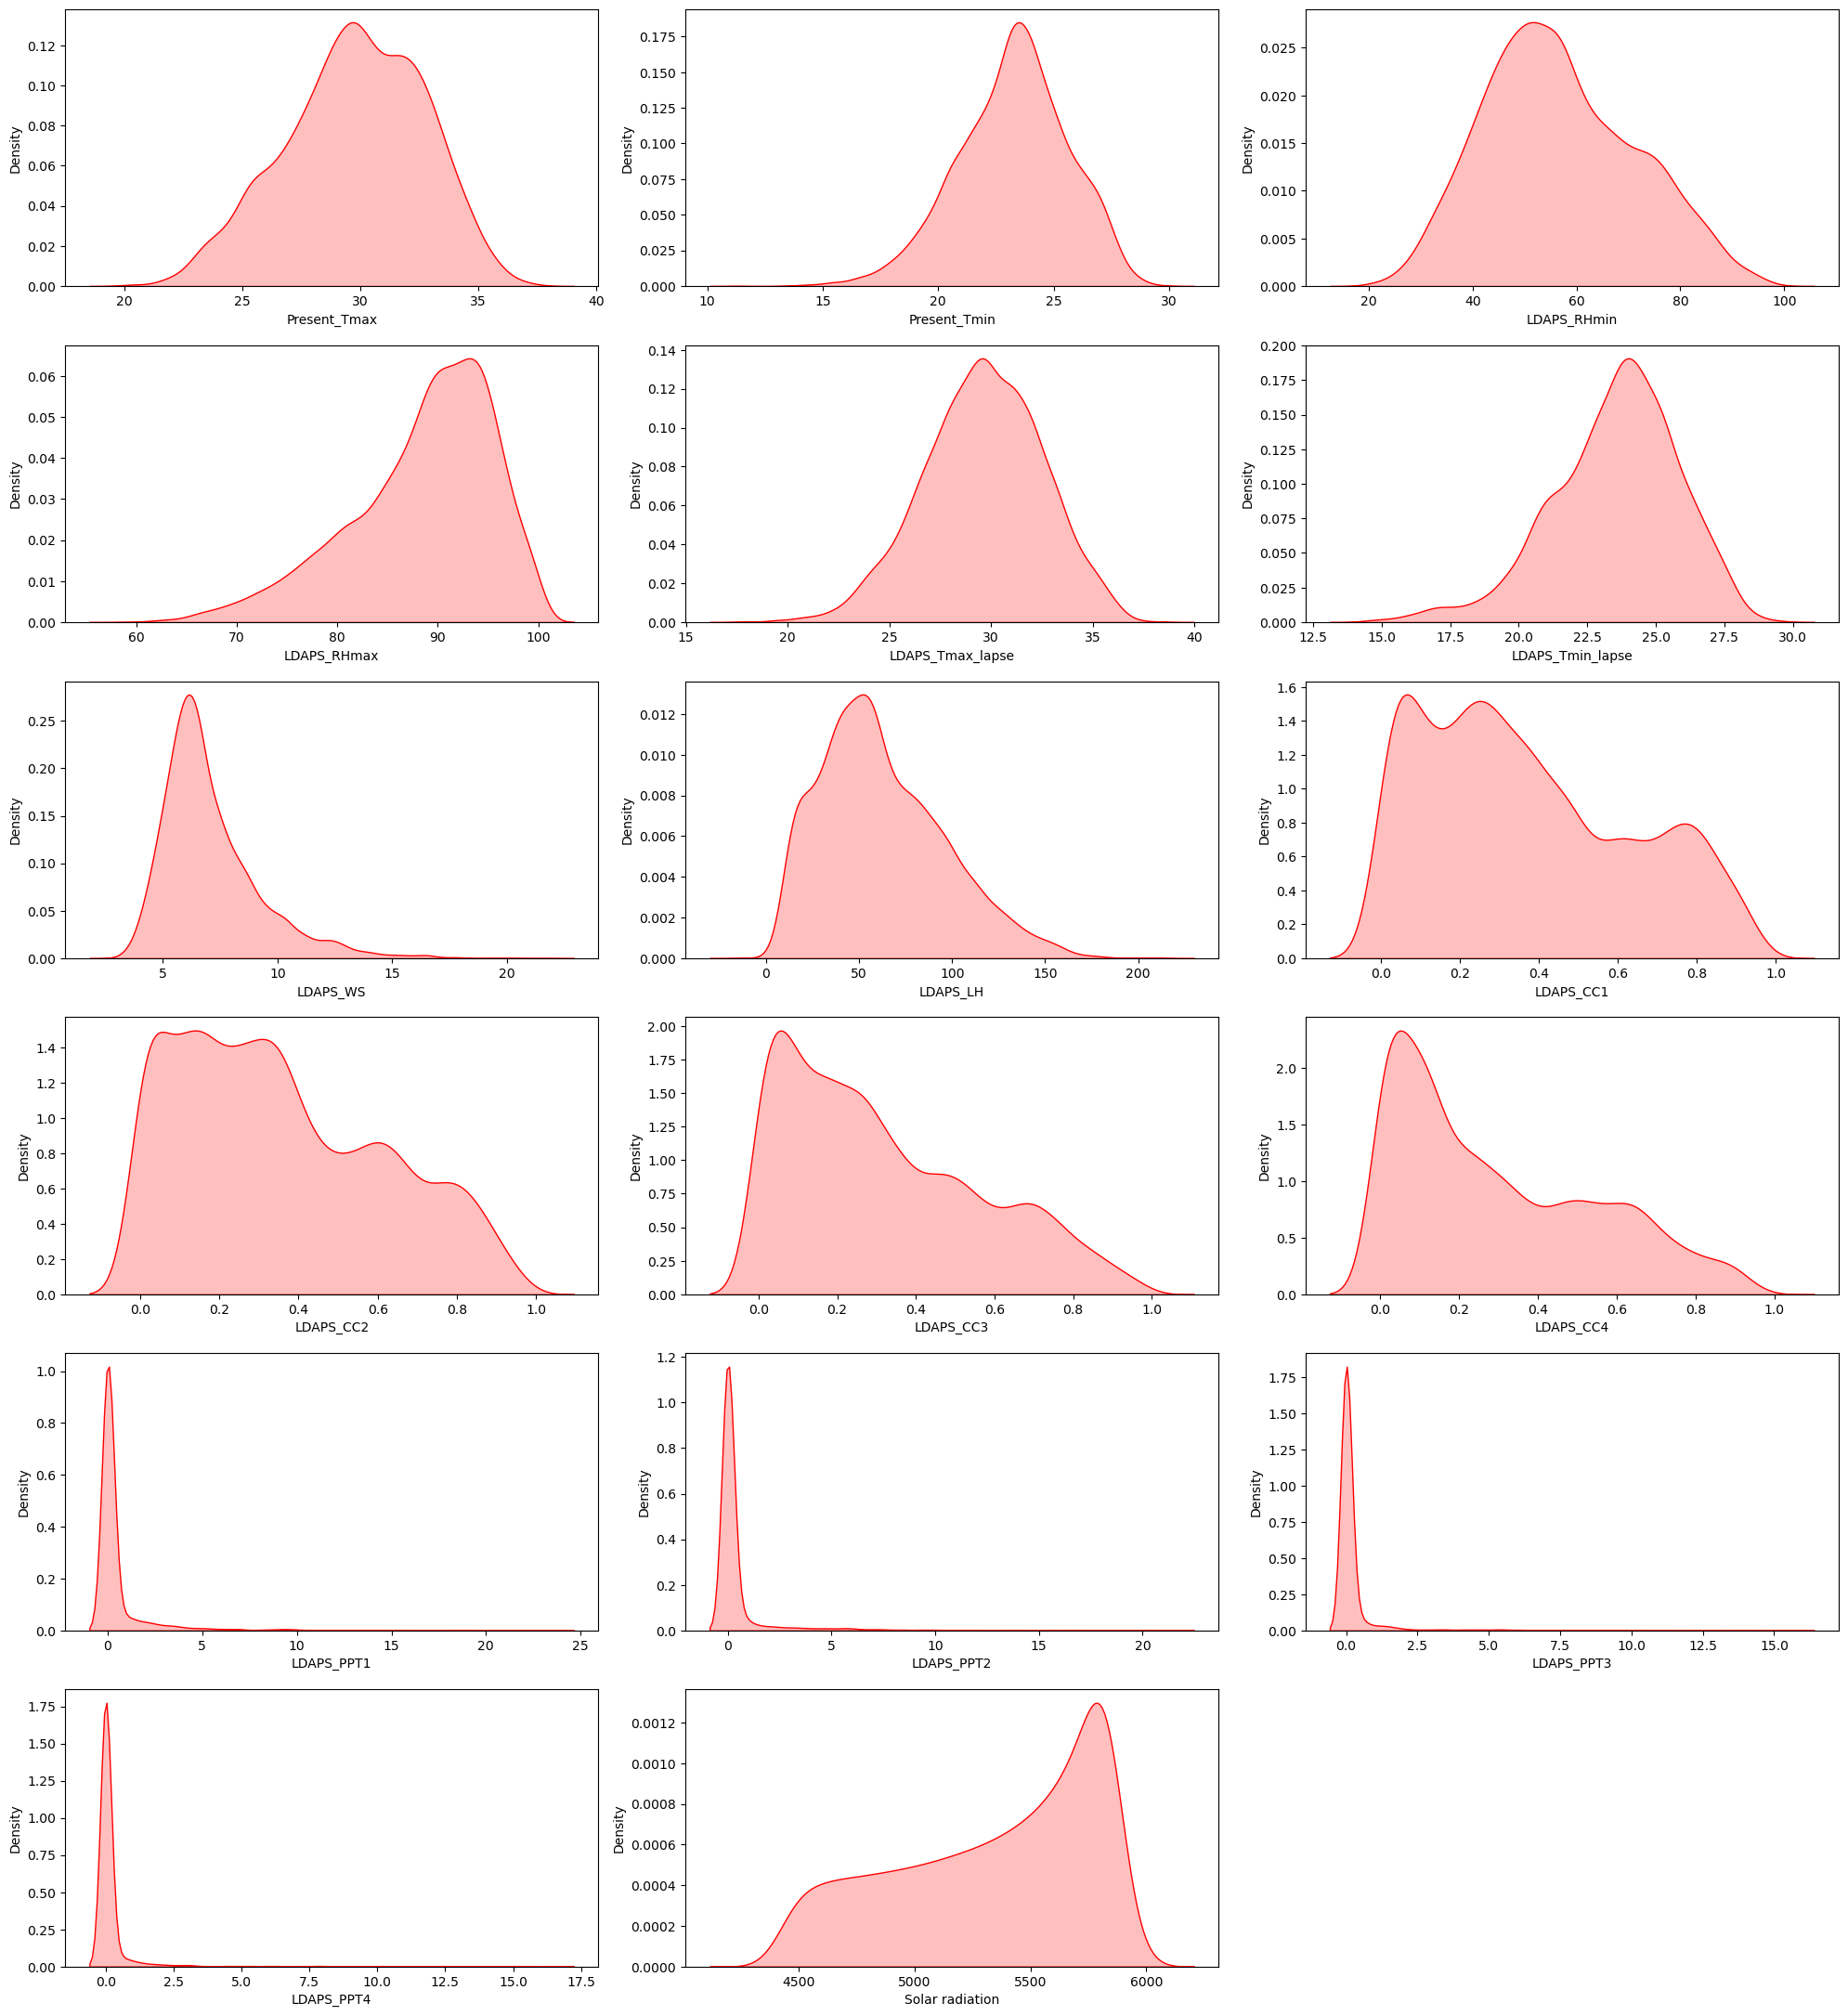

In [59]:
plt.figure(figsize = (20,25),facecolor = 'white')
graph = 1

for col in num_col :
    if graph <= 24:
        plt.subplot(7,3, graph)
        ax = sns.distplot(df[col],color = "r", hist=False, kde_kws ={"shade": True})
        
    graph += 1
plt.tight_layout()   

most of the columns data is normaly distribute except LDAPA_PPT1,LDAPA_PPT2,,LDAPA_PPT3,LDAPA_PPT4
Here we can see that data seems to be normally distributed in Station Column..
In Present Tmax, data seems to be normally distributed with almost no skewness.]=
Present Tmin, seems to slightly skewed towards right but shape seems like bell shaped.
LDAPS_RHmin, seems slightly towards left, it means mean is more than median.
LDAPS_RHmax, is right skewed means, median is more than mean.
LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4 all are also left skewed.
LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, all these are skewed towards left too.


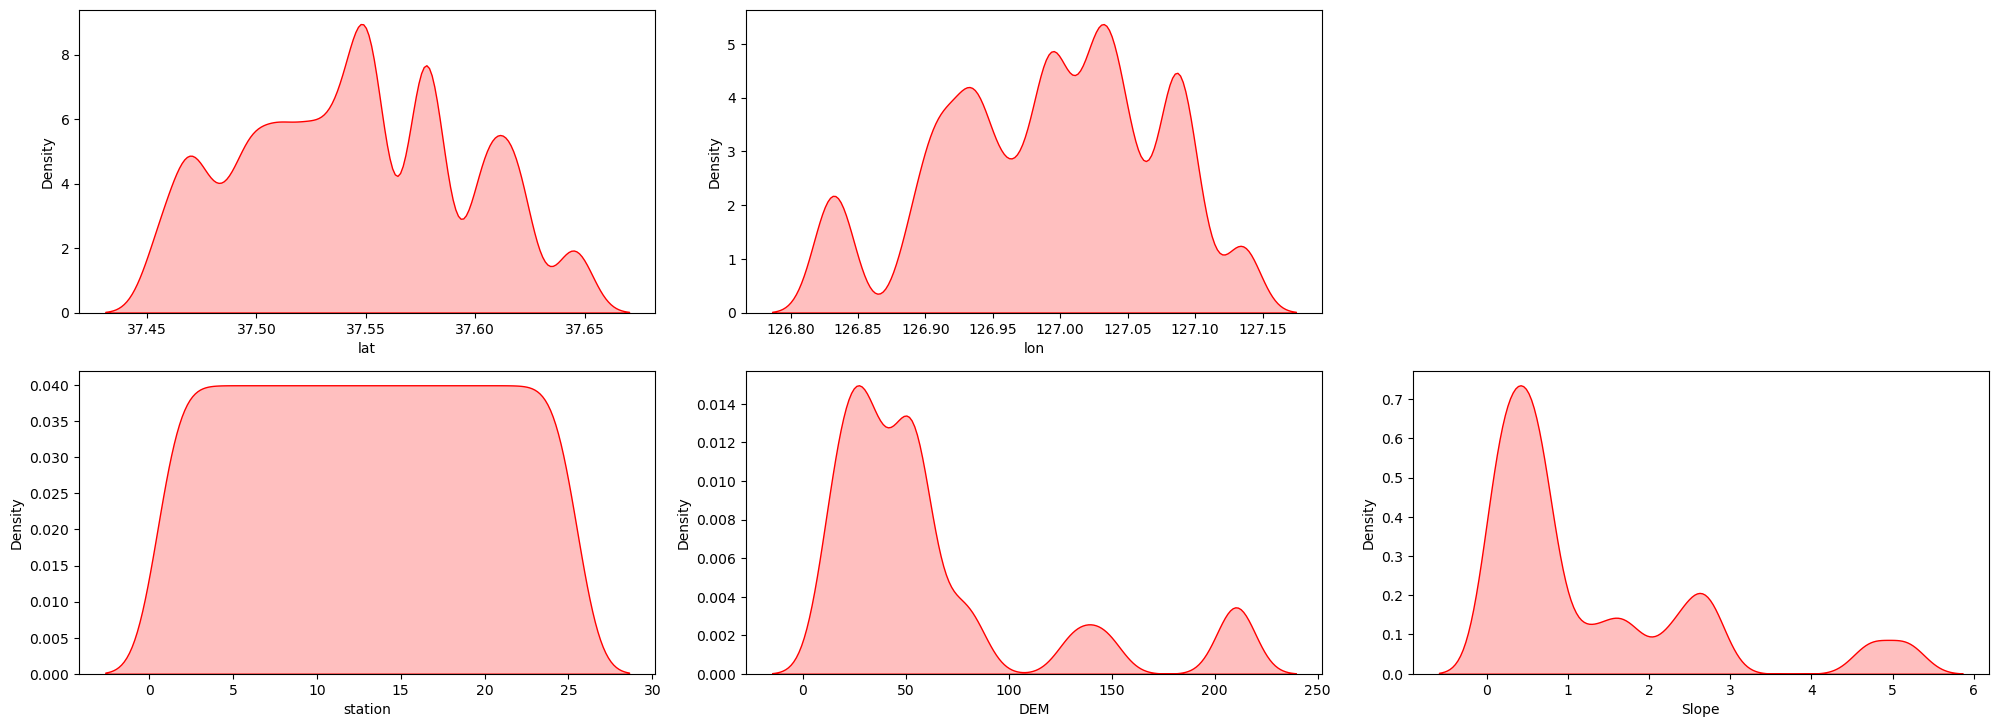

In [60]:
plt.figure(figsize = (20,25),facecolor = 'white')
graph = 1

for col in cat_col :
    if col not in ['Date']:
        if graph <= 24:
            plt.subplot(7,3, graph)
            ax = sns.distplot(df[col],color = "r", hist=False, kde_kws ={"shade": True})
        
    graph += 1
plt.tight_layout()

This all are the categorical columns.

LAT and LON seems to be normally distributed but data in these 2 columns is spreaded means standard deviation is high.

DEM and SLope both are skewed towards the left.

Solar Radiation is Skewed Towards the Right.

# Lets remove the Outliers

In [61]:
from scipy.stats import zscore
out_features = df[['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin','LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 
           'LDAPS_WS','LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4','LDAPS_PPT1',
           'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'Solar radiation']]
z= np.abs(zscore(out_features))

In [62]:
df1 = df[(z<3).all(axis = 1)]
df1.shape

(6901, 24)

In [63]:
print('Data Loss percentage---', ((df.shape[0]-df1.shape[0])/df.shape[0]*100))

Data Loss percentage--- 10.95483870967742


The data is huge..so 10% data loss we can exceptable.

IQR method features only

In [64]:
Q1 = out_features.quantile(0.25)
Q3 = out_features.quantile(0.75)
IQR = Q3-Q1
df2 =   df[~((df<(Q1-1.5*IQR))|(df>(Q3 + 1.5*IQR))).any(axis=1)]

In [65]:
print('Data Loss percentage---', ((df.shape[0]-df2.shape[0])/df.shape[0]*100))

Data Loss percentage--- 51.00645161290323


this data loss is Greater than the 50% .so we will nt use df2 dataset for predition. 

In [66]:
corr = df.corr()
corr

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.112786      0.131921    -0.066796   
Present_Tmax      0.112786      1.000000      0.617699    -0.207063   
Present_Tmin      0.131921      0.617699      1.000000     0.120862   
LDAPS_RHmin      -0.066796     -0.207063      0.120862     1.000000   
LDAPS_RHmax      -0.167164     -0.303364     -0.016023     0.578364   
LDAPS_Tmax_lapse  0.069223      0.568959      0.462183    -0.568528   
LDAPS_Tmin_lapse  0.104905      0.623261      0.763457     0.087422   
LDAPS_WS          0.005292     -0.127286     -0.041603     0.292348   
LDAPS_LH         -0.133557      0.132117     -0.014392    -0.073437   
LDAPS_CC1         0.006922     -0.313700      0.082933     0.613375   
LDAPS_CC2         0.003398     -0.215552      0.088749     0.745177   
LDAPS_CC3         0.000694     -0.147287     -0.007259     0.689149   
LDAPS_CC4         0.006127     -0.144344     -0.049556     0.513273   
LDAPS_PPT1       -0.002734     -0.116546      0.105847     0.260695   
LDAPS_PPT2       -0.008325     -0.106738      0.061038     0.390325   
LDAPS_PPT3       -0.012606     -0.128402     -0.054737     0.238557   
LDAPS_PPT4       -0.010526     -0.107359     -0.071695     0.165601   
lat              -0.237610     -0.054132     -0.080520     0.085909   
lon              -0.118763      0.007527     -0.045560    -0.077696   
DEM              -0.255970     -0.188779     -0.252518     0.100944   
Slope            -0.090113     -0.107333     -0.148301     0.122597   
Solar radiation  -0.019011     -0.027008      0.051659     0.243102   
Next_Tmax         0.108154      0.609320      0.469903    -0.441382   
Next_Tmin         0.128539      0.621706      0.795860     0.092732   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.167164          0.069223          0.104905  0.005292   
Present_Tmax        -0.303364          0.568959          0.623261 -0.127286   
Present_Tmin        -0.016023          0.462183          0.763457 -0.041603   
LDAPS_RHmin          0.578364         -0.568528          0.087422  0.292348   
LDAPS_RHmax          1.000000         -0.377248         -0.116880  0.132932   
LDAPS_Tmax_lapse    -0.377248          1.000000          0.652913 -0.317141   
LDAPS_Tmin_lapse    -0.116880          0.652913          1.000000 -0.134153   
LDAPS_WS             0.132932         -0.317141         -0.134153  1.000000   
LDAPS_LH             0.236726          0.045192         -0.138007  0.002622   
LDAPS_CC1            0.436094         -0.441029          0.009424  0.288058   
LDAPS_CC2            0.390706         -0.526428          0.046302  0.259538   
LDAPS_CC3            0.225610         -0.544139         -0.045879  0.241657   
LDAPS_CC4            0.129057         -0.432007         -0.082255  0.219258   
LDAPS_PPT1           0.267849         -0.117138          0.033908  0.144476   
LDAPS_PPT2           0.228165         -0.249674         -0.003656  0.184123   
LDAPS_PPT3           0.132873         -0.196107         -0.094703  0.152599   
LDAPS_PPT4           0.115949         -0.168024         -0.100940  0.134589   
lat                  0.194745         -0.043896         -0.098009  0.034589   
lon                  0.024221          0.089051         -0.028428 -0.061782   
DEM                  0.176390         -0.180868         -0.197241  0.189051   
Slope                0.218912         -0.164272         -0.187617  0.169501   
Solar radiation      0.146950          0.046231          0.158038  0.121500   
Next_Tmax           -0.284919          0.826630          0.586953 -0.350756   
Next_Tmin           -0.073544          0.585411          0.880694 -0.102888   

                  LDAPS_LH  LDAPS_CC1  ...  LDAPS_PPT2  LDAPS_PPT3  \
station          -0.133557   0.006922  ...   -0.008325   -0.012606   
Present_Tmax      0.132117  -0.313700  ...   -0.106738   -0.128402   
Present_Tmin     -0.014392   0.082933  ...    0.061038   

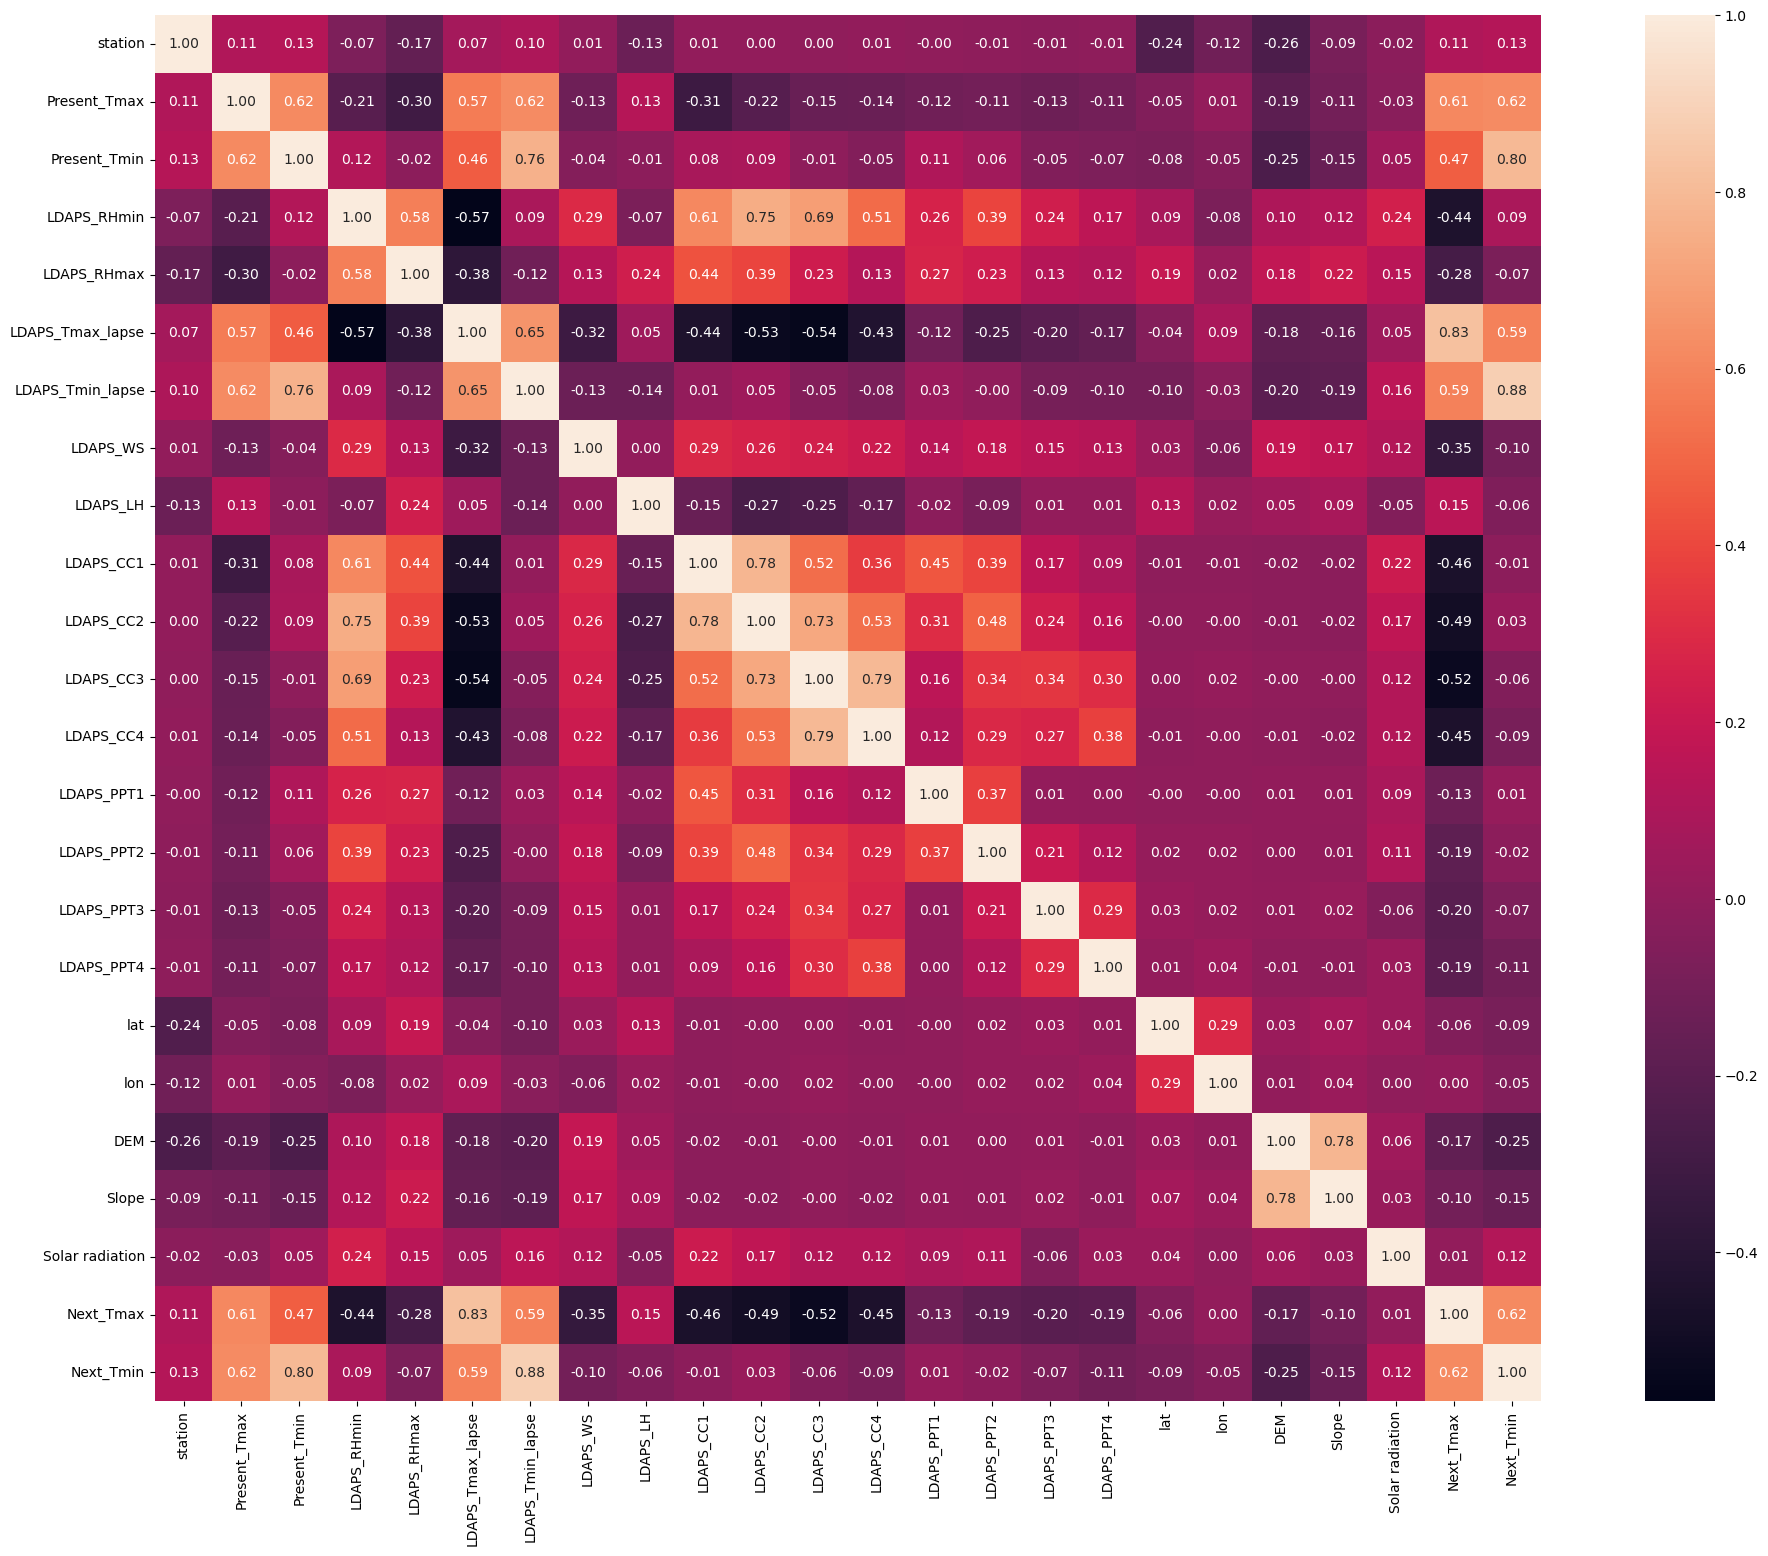

In [67]:
plt.figure(figsize=(27,18))
sns.heatmap(df.corr(), annot=True, square= True, fmt='0.2f')
plt.xticks(rotation=90)
plt.show()

We can see there Present_Tmax and Present_Tmin are highly correlated with Target variables.

LDAPS_RHmm and LDAPS_RHmax are also highly correlated with target variables.

Next_Tmin and Next_Tmax are also highly correlated with each other.

Most of the columns are negatively correlated with target variables

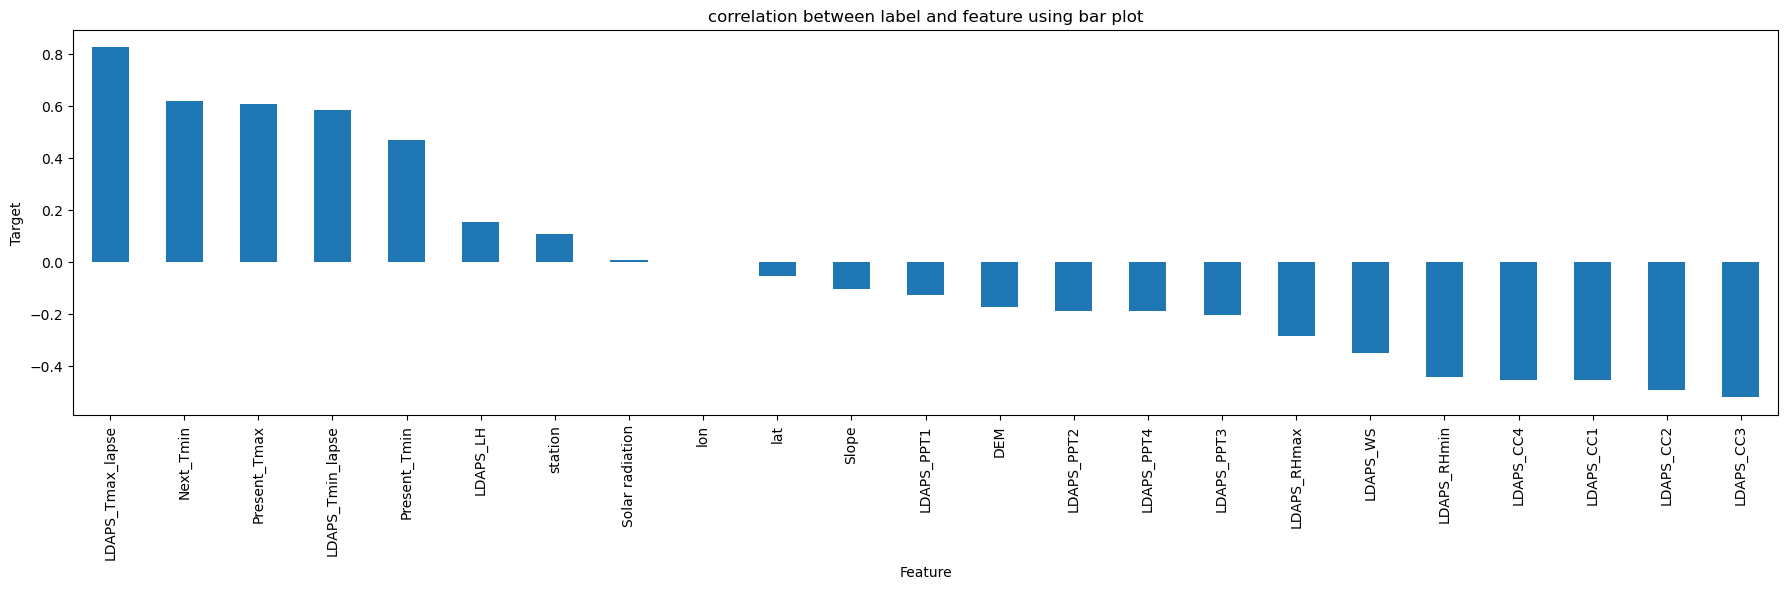

In [68]:
plt.figure(figsize=(22,5))
df.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('Target',fontsize=10)
plt.title('correlation between label and feature using bar plot')
plt.show()

the graph clears that lon, lat and solar radiation are less corelated with our Target variable.

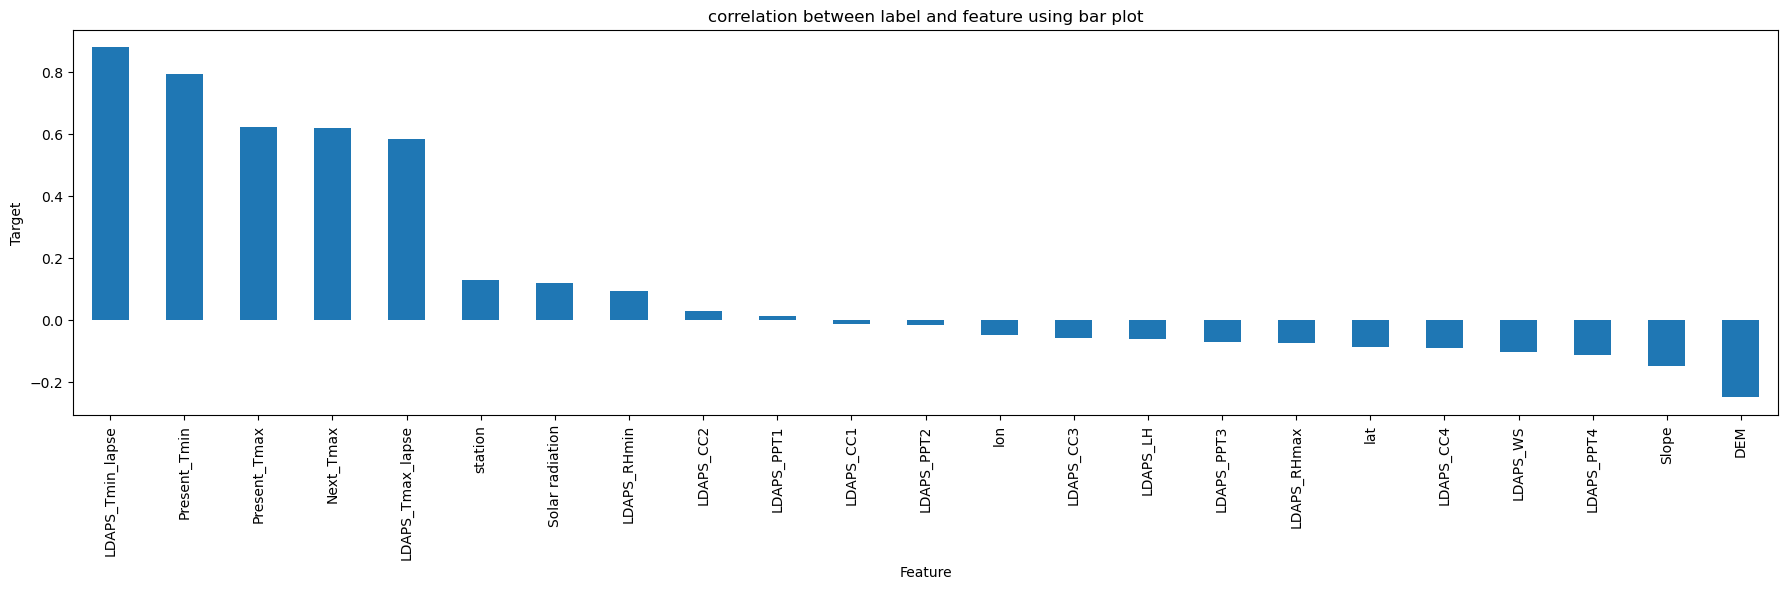

In [69]:
plt.figure(figsize=(22,5))
df.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('Target',fontsize=10)
plt.title('correlation between label and feature using bar plot')
plt.show()

LDAPS_PPT1,LDAPS_PPT2,lon has less corelation with our target variable.

# first Target Variable is Next_Tmax:

Dividing data into X and Y
seperating both variables into different part

In [70]:
# lets separate features and target into x and y
x = df.drop(["Next_Tmax","Next_Tmin"],axis=1)
y1 = df["Next_Tmax"]
y2 = df["Next_Tmin"]


# checking the Skewness

In [71]:
x.skew()

station             0.000000
Present_Tmax       -0.263016
Present_Tmin       -0.357573
LDAPS_RHmin         0.300230
LDAPS_RHmax        -0.855863
LDAPS_Tmax_lapse   -0.224211
LDAPS_Tmin_lapse   -0.582013
LDAPS_WS            1.562204
LDAPS_LH            0.672151
LDAPS_CC1           0.459196
LDAPS_CC2           0.471968
LDAPS_CC3           0.646029
LDAPS_CC4           0.673054
LDAPS_PPT1          5.325873
LDAPS_PPT2          5.714821
LDAPS_PPT3          6.370279
LDAPS_PPT4          6.744793
lat                 0.086942
lon                -0.285300
DEM                 1.723944
Slope               1.563346
Solar radiation    -0.511006
dtype: float64

Skewness optimum level is +/-0.50.
Here there are few columns more than optimum limit so they are skewed.

The following columns have skewness more than +/-0.5 only fueltype is in range. others fectors are out of range so no need to remove skewness in these columns.

we use power tranformation to stablize the variance. make the data more normal disrtibution like Box-cox - This is use only positive values( > 0 )..not work on zero also Yeo-Johnson - This works on both positive and negative values

so in our mwthod we use Yeo-Johnson method.

In [72]:
from sklearn.preprocessing import PowerTransformer

# lets make a list of columns with skewness
skew=['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_WS','LDAPS_CC3','LDAPS_CC4',
      'LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4',
      'DEM','Slope','Solar radiation']

# lets execute
scaler = PowerTransformer (method='yeo-johnson')

In [73]:
x[skew] = scaler.fit_transform(x[skew].values)
x[skew]

LDAPS_RHmax  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_WS  LDAPS_CC3  \
Date                                                                       
2013-06-30     0.269931         -0.314397  0.098335  0.098335  -0.538510   
2013-06-30     0.182702          0.142943 -0.622949 -0.622949  -0.550985   
2013-06-30    -0.777025          0.393555 -0.311020 -0.311020  -0.313567   
2013-06-30     1.316625         -0.176306 -0.654258 -0.654258  -0.541492   
2013-06-30     0.107726         -0.105642 -0.591078 -0.591078  -0.445066   
...                 ...               ...       ...       ...        ...   
2017-08-30    -1.386097         -1.968868 -0.023692 -0.023692  -1.597486   
2017-08-30    -0.811603         -2.103051 -0.566891 -0.566891  -1.597482   
2017-08-30    -1.329445         -1.832817 -0.304008 -0.304008  -1.597486   
2017-08-30    -1.472390         -1.845209 -0.059099 -0.059099  -1.597486   
2017-08-30    -1.476841         -1.906342  0.343233  0.343233  -1.597486   

            LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4  \
Date                                                                    
2013-06-30  -0.580480   -0.557329   -0.519106   -0.492319   -0.444374   
2013-06-30  -0.599355   -0.557329   -0.519106   -0.492319   -0.444374   
2013-06-30  -0.515519   -0.557329   -0.519106   -0.492319   -0.444374   
2013-06-30  -0.561044   -0.557329   -0.519106   -0.492319   -0.444374   
2013-06-30  -0.360578   -0.557329   -0.519106   -0.492319   -0.444374   
...               ...         ...         ...         ...         ...   
2017-08-30  -1.446957   -0.557329   -0.519106   -0.492319   -0.444374   
2017-08-30  -1.342800   -0.557329   -0.519106   -0.492319   -0.444374   
2017-08-30  -1.482044   -0.557329   -0.519106   -0.492319   -0.444374   
2017-08-30  -1.482044   -0.557329   -0.519106   -0.492319   -0.444374   
2017-08-30  -1.475637   -0.557329   -0.519106   -0.492319   -0.444374   

                 DEM     Slope  Solar radiation  
Date                                             
2013-06-30  1.835459  1.314447         1.850167  
2013-06-30  0.056032 -0.385353         1.401217  
2013-06-30 -0.364677 -0.949335         1.381155  
2013-06-30  0.084942  1.235549         1.358278  
2013-06-30 -0.290515 -0.401751         1.367247  
...              ...       ...              ...  
2017-08-30 -0.721794 -0.279523        -1.739436  
2017-08-30 -1.006373 -1.355104        -1.756893  
2017-08-30 -1.578769 -1.280717        -1.755049  
2017-08-30 -1.401188 -1.073155        -1.761072  
2017-08-30 -1.193581 -0.935211        -1.745203  

[7750 rows x 13 columns]

In [74]:
# Lets check the skewness again
x.skew()

station             0.000000
Present_Tmax       -0.263016
Present_Tmin       -0.357573
LDAPS_RHmin         0.300230
LDAPS_RHmax        -0.116480
LDAPS_Tmax_lapse   -0.224211
LDAPS_Tmin_lapse   -0.019053
LDAPS_WS            0.004202
LDAPS_LH            0.672151
LDAPS_CC1           0.459196
LDAPS_CC2           0.471968
LDAPS_CC3           0.089606
LDAPS_CC4           0.129753
LDAPS_PPT1          1.463967
LDAPS_PPT2          1.646387
LDAPS_PPT3          1.824595
LDAPS_PPT4          2.059402
lat                 0.086942
lon                -0.285300
DEM                 0.039436
Slope               0.233914
Solar radiation    -0.176686
dtype: float64

Tried removing the skewness but its not removing completely

In [75]:
# feature scaling using standard scalurization

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0    -1.664101     -0.361783     -0.761306     0.102642     0.269931   
1    -1.525426      0.721741     -0.677909    -0.308235     0.182702   
2    -1.386750      0.620161      0.030964    -0.553221    -0.777025   
3    -1.248075      0.755601      0.072663     0.101551     1.316625   
4    -1.109400      0.552440     -0.552814    -0.040088     0.107726   
...        ...           ...           ...          ...          ...   
7745  1.109400     -2.257951     -2.262449    -2.198944    -1.386097   
7746  1.248075     -2.461112     -2.429243    -1.828277    -0.811603   
7747  1.386750     -2.190230     -2.554338    -2.058222    -1.329445   
7748  1.525426     -2.190230     -2.304148    -2.243400    -1.472390   
7749  1.664101     -2.224091     -2.429243    -2.319347    -1.476841   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0            -0.525839         -0.314397  0.098335  0.209167  -0.516303  ...   
1             0.080884          0.142943 -0.622949 -0.313357  -0.548628  ...   
2             0.163053          0.393555 -0.311020 -1.249084  -0.610542  ...   
3             0.031004         -0.176306 -0.654258  0.098045  -0.583622  ...   
4            -0.170725         -0.105642 -0.591078  1.358187  -0.832455  ...   
...                ...               ...       ...       ...        ...  ...   
7745         -0.615111         -1.968868 -0.023692 -1.576035  -1.209752  ...   
7746         -0.993434         -2.103051 -0.566891  0.587907  -1.157818  ...   
7747         -1.113927         -1.832817 -0.304008  0.286929  -1.297343  ...   
7748         -0.889174         -1.845209 -0.059099 -0.453458  -1.274975  ...   
7749         -0.571801         -1.906342  0.343233 -1.591669  -1.224877  ...   

      LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       lat  \
0     -0.580480   -0.557329   -0.519106   -0.492319   -0.444374  1.189704   
1     -0.599355   -0.557329   -0.519106   -0.492319   -0.444374  1.189704   
2     -0.515519   -0.557329   -0.519106   -0.492319   -0.444374  0.653264   
3     -0.561044   -0.557329   -0.519106   -0.492319   -0.444374  1.992377   
4     -0.360578   -0.557329   -0.519106   -0.492319   -0.444374  0.118811   
...         ...         ...         ...         ...         ...       ...   
7745  -1.446957   -0.557329   -0.519106   -0.492319   -0.444374  0.118811   
7746  -1.342800   -0.557329   -0.519106   -0.492319   -0.444374 -0.685848   
7747  -1.482044   -0.557329   -0.519106   -0.492319   -0.444374 -0.149408   
7748  -1.482044   -0.557329   -0.519106   -0.492319   -0.444374 -0.417628   
7749  -1.475637   -0.557329   -0.519106   -0.492319   -0.444374 -0.417628   

           lon       DEM     Slope  Solar radiation  
0    -0.005038  1.835459  1.314447         1.850167  
1     0.511327  0.056032 -0.385353         1.401217  
2     0.838778 -0.364677 -0.949335         1.381155  
3     0.385384  0.084942  1.235549         1.358278  
4     1.808536 -0.290515 -0.401751         1.367247  
...        ...       ...       ...              ...  
7745  0.612081 -0.721794 -0.279523        -1.739436  
7746  1.191417 -1.006373 -1.355104        -1.756893  
7747 -1.264464 -1.578769 -1.280717        -1.755049  
7748 -1.037767 -1.401188 -1.073155        -1.761072  
7749 -0.269517 -1.193581 -0.935211        -1.745203  

[7750 rows x 22 columns]

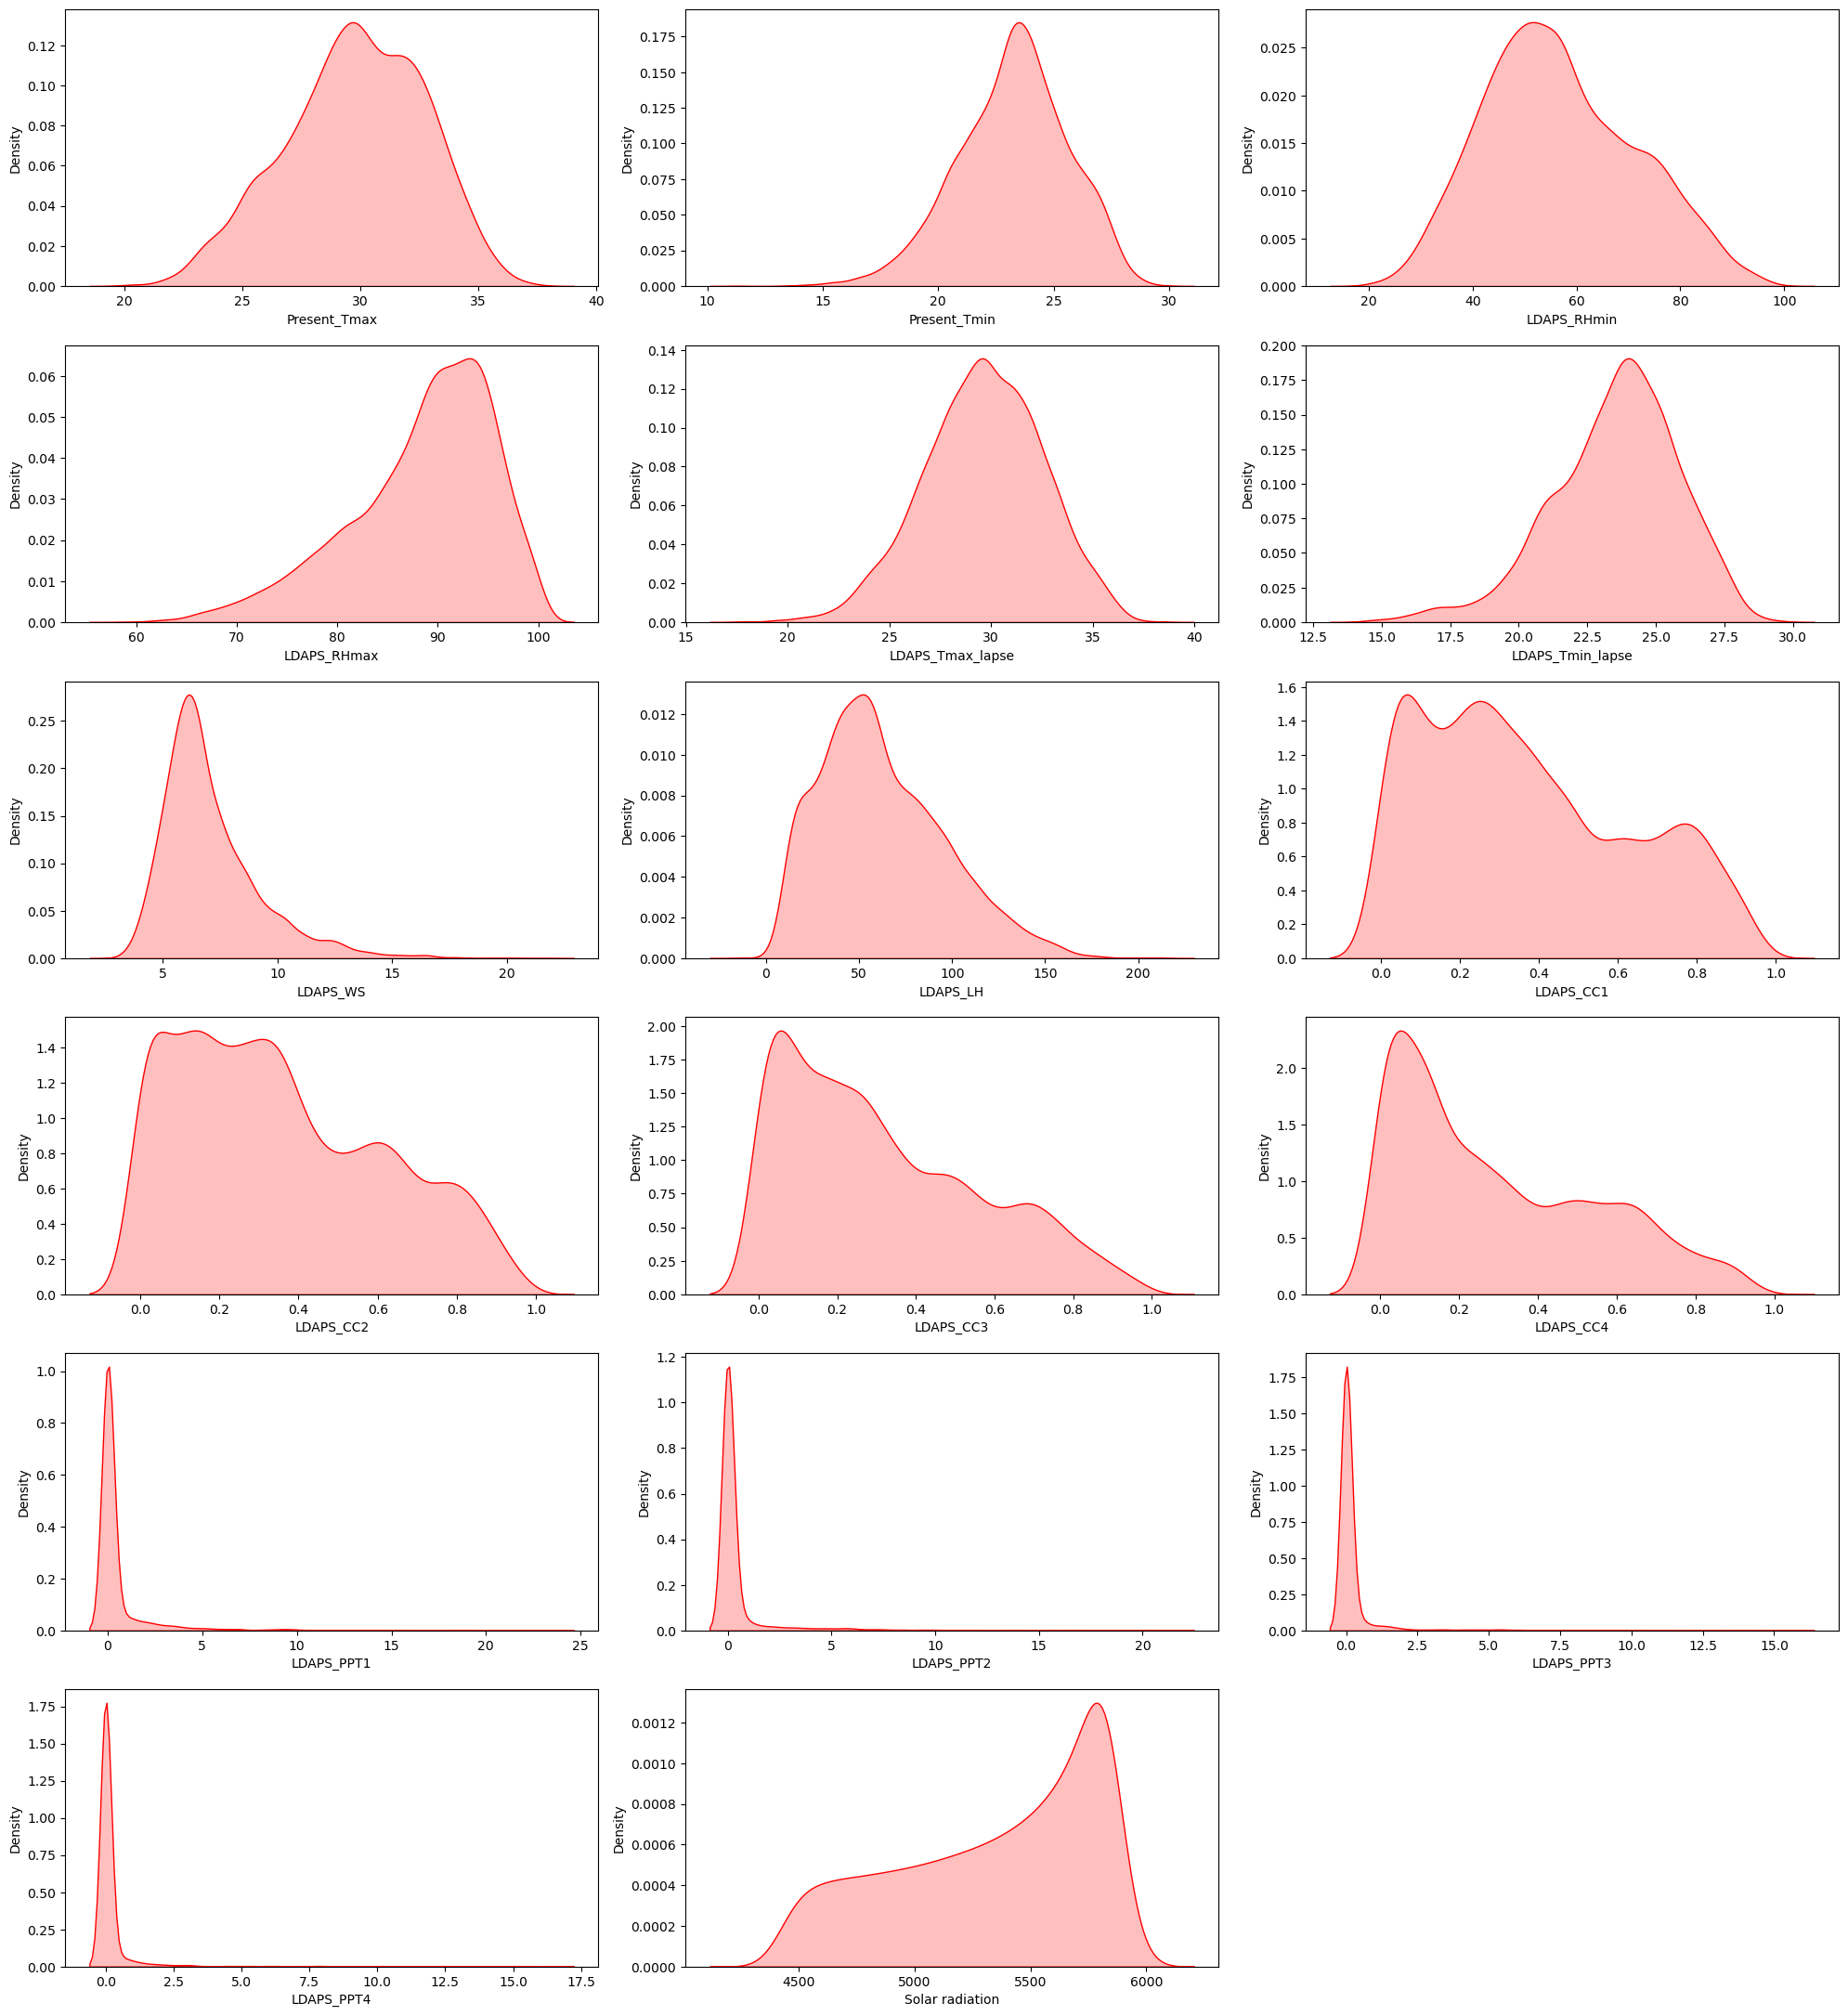

In [77]:
# Again check the distribution plot
plt.figure(figsize = (20,25),facecolor = 'white')
graph = 1

for col in num_col :
    if graph <= 24:
        plt.subplot(7,3, graph)
        ax = sns.distplot(df[col],color = "r", hist=False, kde_kws ={"shade": True})
        
    graph += 1
plt.tight_layout()

# VIF(Variance Inflation Factor):

In [78]:
# Lets find varience inflation factor in each scaled column i.e x.shape[1] (1/(1-R2))
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

VIF values          Features
0     1.279747           station
1     2.795005      Present_Tmax
2     3.083149      Present_Tmin
3     6.400943       LDAPS_RHmin
4     2.590372       LDAPS_RHmax
5     6.977985  LDAPS_Tmax_lapse
6     6.613244  LDAPS_Tmin_lapse
7     1.258558          LDAPS_WS
8     1.489448          LDAPS_LH
9     5.059113         LDAPS_CC1
10    6.072455         LDAPS_CC2
11    5.068325         LDAPS_CC3
12    3.040671         LDAPS_CC4
13    2.605600        LDAPS_PPT1
14    2.371772        LDAPS_PPT2
15    1.787337        LDAPS_PPT3
16    1.822037        LDAPS_PPT4
17    1.293437               lat
18    1.222271               lon
19    3.275419               DEM
20    2.874454             Slope
21    1.236502   Solar radiation

all values  are below 10 means we are free from multicollinearity issue.

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y1_train,y1_test=train_test_split(x,y1,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train,y1_train)
    pred_LR = LR.predict(x_test)
    score = r2_score(y1_test,pred_LR)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is ",maxR2_Score," on Random_state",maxRS)

Best accuracy is  0.7888028362811521  on Random_state 627


In [80]:
# spliting data 70% for train and 30% for test
x_train,x_test,y1_train,y1_test = train_test_split(x,y1,test_size=.30,random_state=maxRS)

In [81]:
x.shape

(7750, 22)

In [82]:
y1.shape

(7750,)

# Predict with different model by using for loop

In [83]:
# importing all the required libraries to find best Algorithm.
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [84]:
model=[LinearRegression(), RandomForestRegressor(), DecisionTreeRegressor(),
       KNeighborsRegressor(), GradientBoostingRegressor(), Ridge(), SVR()]
for m in model:
    print("-------------------------------------------------------------")
    print('accuracy score of : ',m)
    m.fit(x_train,y1_train)
    pred = m.predict(x_test)
    
    print("R2 Score:                ", r2_score(y1_test,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y1_test,pred))
    print("Mean Squared Error:      ", mean_squared_error(y1_test,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y1_test,pred)))
    score=cross_val_score(m,x,y1,cv=8)
    print(score)
    
    print("Cross Validation Score:  ",score.mean())
    print("Difference between R2 score and Cross Validation Score is :  ", r2_score(y1_test,pred)-abs(score.mean()))
    print("----------------------------------------------------------------")

-------------------------------------------------------------
accuracy score of :  LinearRegression()
R2 Score:                 0.7888028362811521
Mean Absolute Error:      1.111448833106402
Mean Squared Error:       2.1804277311006923
Root Mean Squared Error:  1.476627146946951
[0.60165845 0.61335594 0.60457168 0.66967716 0.72903917 0.71163397
 0.76348854 0.72101008]
Cross Validation Score:   0.6768043720277506
Difference between R2 score and Cross Validation Score is :   0.11199846425340154
----------------------------------------------------------------
-------------------------------------------------------------
accuracy score of :  RandomForestRegressor()
R2 Score:                 0.9100889005413639
Mean Absolute Error:      0.71141173397713
Mean Squared Error:       0.928254201625279
Root Mean Squared Error:  0.96345949661897
[0.65549698 0.65909    0.61795523 0.6104391  0.70792104 0.66066903
 0.77265327 0.6897641 ]
Cross Validation Score:   0.671748594853471
Difference between R

Linear Regressor and Ridge have same accuracy 78% and same cross validation score 68% diifrence is also same 10%

so we choose Ridge is for our model.

# Hyper Parameter Tuning

In [85]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_iter' :[0,10,20],
              'random_state' :[15,16,17,18,19,20],
              'solver' : [ 'auto', 'svd','cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
Rd=Ridge()

clf =GridSearchCV(Ridge(), parameters, cv=5)
clf.fit(x_train, y1_train)
clf.best_params_ 

{'max_iter': 10, 'random_state': 17, 'solver': 'sag'}

In [86]:
clf_pred=clf.best_estimator_.predict(x_test)

In [87]:
r2_score(y1_test, clf_pred)

0.7884632691936369

Our model learn almost 78.84 % for Next_Tmax

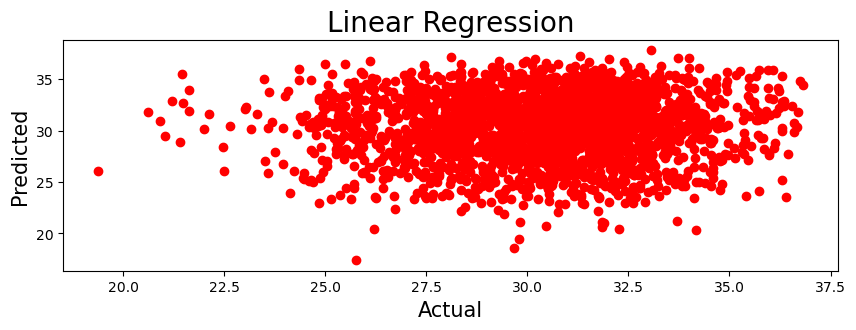

In [88]:
plt.figure(figsize=(10,3))
plt.scatter(x=pred_LR, y=y1_test, color = 'r')
plt.xlabel('Actual', fontsize = 15)
plt.ylabel('Predicted',fontsize = 15)
plt.title('Linear Regression', fontsize = 20)
plt.show()

We are Selecting Linear regressor here because Ridge and linear Regressor has the same accuracy.

In [90]:
import joblib
joblib.dump(clf.best_estimator_,"Temperature_Tmax.pkl")
model =joblib.load("Temperature_Tmax.pkl")
Predicted = model.predict(x_test)
Predicted


array([25.19217029, 31.17090381, 31.23578801, ..., 30.22190637,
       30.76842588, 25.7657119 ])

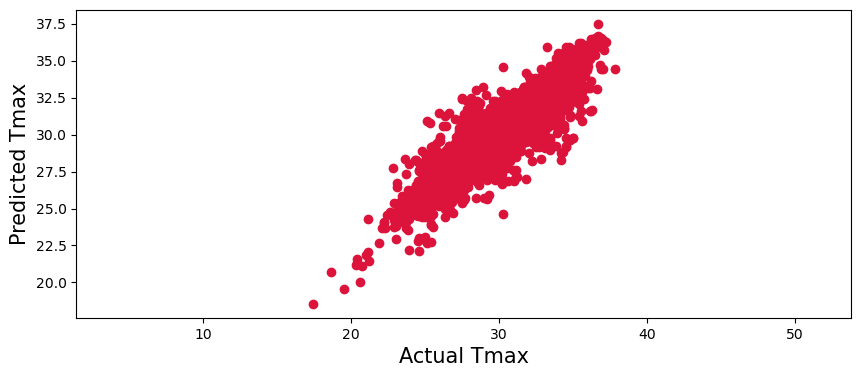

In [91]:
plt.figure(figsize=(10,4))
plt.scatter(y1_test, Predicted, c='crimson')

plt.xlabel('Actual Tmax', fontsize=15)
plt.ylabel('Predicted Tmax', fontsize=15)
plt.axis('equal')
plt.show()

In [92]:
a= np.array(y1_test)
df = pd.DataFrame()
df["predicted"] = Predicted
df["original"]  = a
df

predicted  original
0     25.192170      25.2
1     31.170904      32.8
2     31.235788      33.7
3     32.812645      33.2
4     28.342052      26.4
...         ...       ...
2320  33.112183      34.4
2321  30.750673      32.2
2322  30.221906      29.8
2323  30.768426      25.3
2324  25.765712      26.3

[2325 rows x 2 columns]

In [93]:
conclusion = pd.DataFrame([model.predict(x_test)[:], y1_test[:]], index = ["predicted", "original"])
conclusion

0          1          2          3          4          5     \
predicted  25.19217  31.170904  31.235788  32.812645  28.342052  30.461709   
original   25.20000  32.800000  33.700000  33.200000  26.400000  27.300000   

               6          7         8         9     ...       2315       2316  \
predicted  32.24306  31.082271  31.44499  32.39051  ...  34.756952  29.188365   
original   29.70000  31.500000  28.70000  32.10000  ...  35.300000  30.400000   

                2317      2318       2319       2320       2321       2322  \
predicted  27.017347  30.77179  31.332289  33.112183  30.750673  30.221906   
original   29.200000  31.60000  32.100000  34.400000  32.200000  29.800000   

                2323       2324  
predicted  30.768426  25.765712  
original   25.300000  26.300000  

[2 rows x 2325 columns]

# Second Target Variable is Next_Tmin:

In [94]:
maxR2_Score=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y2_train,y2_test=train_test_split(x,y2,test_size=.25,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train,y2_train)
    predrf = LR.predict(x_test)
    score = r2_score(y2_test,predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is ",maxR2_Score," on Random_state",maxRS)

Best accuracy is  0.8459149115156848  on Random_state 36


In [95]:
x_train,x_test,y2_train,y2_test = train_test_split(x,y2,test_size=.25,random_state=maxRS)

In [96]:
from sklearn.neighbors import KNeighborsRegressor

In [97]:
model=[LinearRegression(),RandomForestRegressor(), DecisionTreeRegressor(), KNeighborsRegressor(), GradientBoostingRegressor(), Ridge(), SVR()]
for m in model:
    print("-------------------------------------------------------------")
    print('accuracy score of -> ',m)
    m.fit(x_train,y2_train)
    pred = m.predict(x_test)
    
    print("R2 Score:                ", r2_score(y2_test,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y2_test,pred))
    print("Mean Squared Error:      ", mean_squared_error(y2_test,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y2_test,pred)))
    score=cross_val_score(m,x,y2,cv=8)
    print(score)
    
    print("Cross Validation Score:  ",score.mean())
    print("Difference between R2 score and Cross Validation Score is :  ", r2_score(y2_test,pred)-abs(score.mean()))
    print("----------------------------------------------------------------")

-------------------------------------------------------------
accuracy score of ->  LinearRegression()
R2 Score:                 0.8459149115156848
Mean Absolute Error:      0.7686320938605836
Mean Squared Error:       0.9922285353406302
Root Mean Squared Error:  0.9961066887340081
[0.54230879 0.82805389 0.64679682 0.79447185 0.79240235 0.76671645
 0.85536193 0.87807836]
Cross Validation Score:   0.763023804648576
Difference between R2 score and Cross Validation Score is :   0.08289110686710877
----------------------------------------------------------------
-------------------------------------------------------------
accuracy score of ->  RandomForestRegressor()
R2 Score:                 0.9113511589538994
Mean Absolute Error:      0.5732977660311825
Mean Squared Error:       0.5708528357678848
Root Mean Squared Error:  0.7555480367044076
[0.53546387 0.78755924 0.65549238 0.81740959 0.7972512  0.77179404
 0.85762706 0.88639656]
Cross Validation Score:   0.7636242426293727
Difference 

Linear Regression and Ridge has same score and CV score.
In first Target varibale we have chosem ridge is our model But now we are chosing linear regression
Linear Regression as final score for Hyper Parameter Tuning because the difference between the R2 score and Cross Validation Score is minimum compare to other models.

# Hyper Parameter Tuning
# with Linear Regression for Next_Tmin

In [98]:
parameters = {'fit_intercept' :[True],
              'n_jobs' :[-1],
              'normalize' :[False],
              'positive' :[False]}
LR=LinearRegression()

clf =GridSearchCV(LinearRegression(), parameters, cv=5)
clf.fit(x_train, y2_train)
clf.best_params_ 

{'fit_intercept': True, 'n_jobs': -1, 'normalize': False, 'positive': False}

In [99]:
clf_pred=clf.best_estimator_.predict(x_test)

In [100]:
r2_score(y2_test, clf_pred)

0.8459149115156848

# Saving the Model

In [101]:
import joblib
joblib.dump(clf.best_estimator_,"Temperature_Tmin.obj")
RF_from_joblib=joblib.load("Temperature_Tmin.obj")
Predicted = RF_from_joblib.predict(x_test)
Predicted

array([24.17133314, 18.22001711, 23.96088804, ..., 19.8284263 ,
       22.75809892, 20.29747152])

In [102]:
a= np.array(y2_test)
df = pd.DataFrame()
df["predicted"] = Predicted
df["original"]  = a
df

predicted  original
0     24.171333      24.2
1     18.220017      18.1
2     23.960888      24.7
3     24.716766      23.5
4     24.206519      25.0
...         ...       ...
1933  21.827937      22.7
1934  25.220433      24.7
1935  19.828426      20.8
1936  22.758099      23.3
1937  20.297472      22.5

[1938 rows x 2 columns]

In [103]:
conclusion = pd.DataFrame([RF_from_joblib.predict(x_test)[:], y2_test[:]], index = ["predicted", "original"])
conclusion

0          1          2          3          4          5     \
predicted  24.171333  18.220017  23.960888  24.716766  24.206519  24.658905   
original   24.200000  18.100000  24.700000  23.500000  25.000000  26.800000   

                6          7          8          9     ...       1928  \
predicted  26.125654  22.682979  26.686282  23.674551  ...  22.966769   
original   26.200000  22.800000  27.600000  23.700000  ...  20.700000   

                1929       1930       1931       1932       1933       1934  \
predicted  23.392928  24.413011  22.665235  24.345406  21.827937  25.220433   
original   24.500000  23.700000  22.932837  24.800000  22.700000  24.700000   

                1935       1936       1937  
predicted  19.828426  22.758099  20.297472  
original   20.800000  23.300000  22.500000  

[2 rows x 1938 columns]